## Creating datasets for analysis 




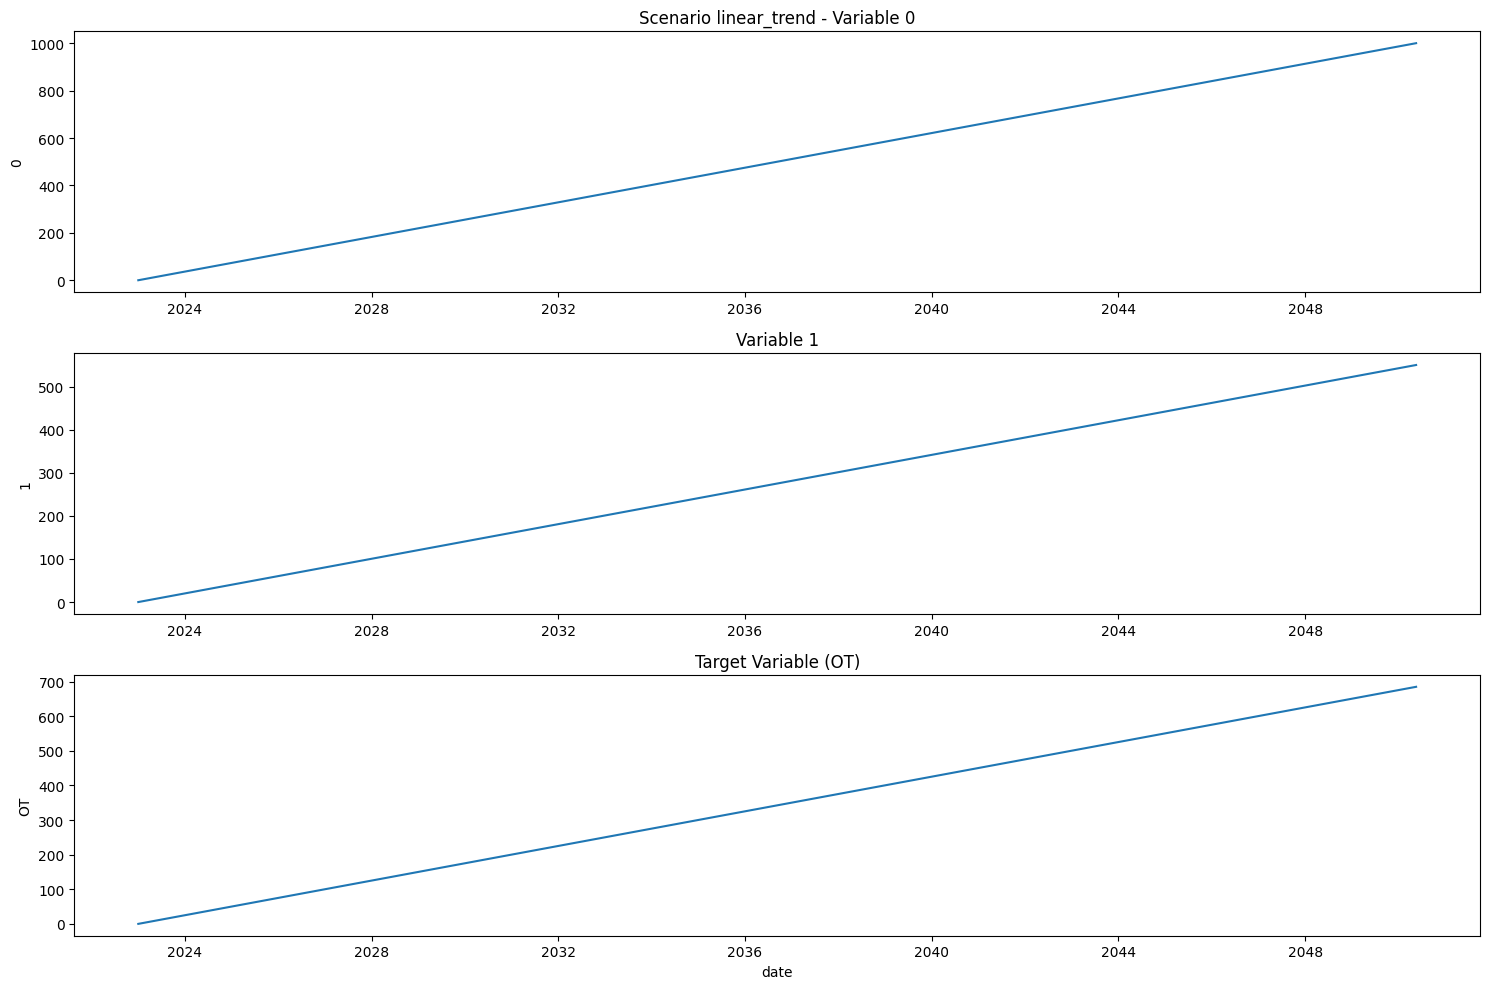

Generated data for Scenario linear_trend


In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_time_series(scenario, n_samples=10000):
    t = np.arange(n_samples)

    if scenario == 'linear_trend':
        var0 = np.linspace(0, 1000, n_samples)
        var1 = 0.5 * var0 + 0.005 * t
        OT = 0.3 * var0 + 0.7 * var1 

    elif scenario == 'simple_seasonality':
        var0 = 5 + 1 * np.sin(2 * np.pi * t / 7)
        var1 = 3 + 0.5 * np.cos(2 * np.pi * t / 14)
        OT = 0.3 * var0 + 0.7 * var1

    elif scenario == 'mild_complexity':
        var0 = np.random.normal(0, 1, n_samples)
        var1 = 0.3 * var0 #+ np.random.normal(0, 0.5, n_steps)
        OT = 0.7 * var0 + 0.5 * var1 #+ np.random.normal(0, 0.3, n_steps)

    elif scenario == 'trend_and_seasonality':
        trend = np.linspace(0, 1000, n_samples)
        seasonality =  np.sin(2 * np.pi * t / 30)
        var0 = trend 
        var1 = seasonality
        OT = 0.6 * var0 + 10 * var1 


    elif scenario == 'complex_seasonality':
        var0 = 5 + 2 * np.sin(2 * np.pi * t / 14) + 5 * np.sin(2 * np.pi * t / 30)
        var1 = 3 + 6 * np.cos(2 * np.pi * t / 14) + 3 * np.cos(2 * np.pi * t / 30)
        OT = 0.3 * var0 + 0.7 * var1 

    elif scenario == 'trend_complex_seasonality':
        trend = np.exp(0.0005 * t)
        seasonality = (
            5 * np.sin(2 * np.pi * t / 365) +  # Annual cycle
            2 * np.sin(2 * np.pi * t / 30) +   # Monthly cycle
            1 * np.sin(2 * np.pi * t / 7)      # Weekly cycle
        )
        var0 = trend + seasonality
        var1 = 0.5 * var0 + 0.5 * trend
        OT = 0.7 * var0 + 0.3 * var1

    # elif scenario == 'lagged_variables':
    #     var0 = 50 + 10 * np.sin(2 * np.pi * t / 365)
    #     var1 = np.roll(var0, 30)  # var1 lags var0 by 30 time steps
    #     OT = np.roll(0.3 * var0 + 0.7 * var1, 15)  # OT lags the combination by 15 time steps

    elif scenario == 'regime_switching':
        var0 = np.where(t < n_samples/2, 
                        50 + 10 * np.sin(2 * np.pi * t / 365), 
                        70 + 5 * np.cos(2 * np.pi * t / 365))
        var1 = np.where(t < n_samples/2, 
                        0.5 * var0 + 10, 
                        0.7 * var0 - 10)
        OT = np.where(t < n_samples/2, 
                      0.3 * var0 + 0.7 * var1, 
                      0.6 * var0 + 0.4 * var1)

    elif scenario == 'hidden_confounder':
        hidden = 10 * np.sin(2 * np.pi * t / 365)  # Hidden confounding variable
        var0 = 50 + 5 * np.sin(2 * np.pi * t / 30) + 0.3 * hidden
        var1 = 30 + 3 * np.cos(2 * np.pi * t / 30) + 0.3 * hidden
        OT = 0.3 * var0 + 0.7 * var1 + 0.2 * hidden

    else:
        raise ValueError(f"Unknown scenario: {scenario}")
    
    return pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=n_samples, freq='D'),'0': var0, '1': var1, 'OT': OT})

def plot_scenario(data, scenario):
    plt.figure(figsize=(12, 6))
    plt.plot(data['var0'], label='var0')
    plt.plot(data['var1'], label='var1')
    plt.plot(data['OT'], label='OT')
    plt.title(f"Scenario: {scenario}")
    plt.legend()
    plt.show()

def plot_scenario(df, scenario):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    sns.lineplot(x='date', y='0', data=df)
    plt.title(f'Scenario {scenario} - Variable 0')
    plt.xlabel('')
    
    plt.subplot(3, 1, 2)
    sns.lineplot(x='date', y='1', data=df)
    plt.title('Variable 1')
    plt.xlabel('')
    
    plt.subplot(3, 1, 3)
    sns.lineplot(x='date', y='OT', data=df)
    plt.title('Target Variable (OT)')
    
    plt.tight_layout()
    plt.savefig(f'scenario_{scenario}_plot.png')
    plt.show()
    plt.close()
scenarios = [
    'linear_trend','simple_seasonality', 'mild_complexity',
    'trend_and_seasonality', 'complex_seasonality',
    'trend_complex_seasonality', 'lagged_variables',
    'regime_switching', 'hidden_confounder'
]
# Generate data for each scenario
scenario = scenarios[0]
df = generate_time_series(scenario, n_samples=10000)
df.to_csv(f'scenario_{scenario}_data.csv', index=False)
plot_scenario(df, scenario)
print(f"Generated data for Scenario {scenario}")


# for scenario in scenarios:
#     data = generate_synthetic_data(scenario)
#     plot_scenario(data, scenario)
#     print(f"Generated data for scenario: {scenario}")
#     print(data.head())
#     print("\n")

# Example of saving data to CSV
# data.to_csv(f"{scenario}_data.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 - 17s - 22ms/step - loss: 0.0116 - val_loss: 0.0011
Epoch 2/10
750/750 - 1s - 1ms/step - loss: 6.2132e-05 - val_loss: 3.5578e-04
Epoch 3/10
750/750 - 1s - 1ms/step - loss: 1.8300e-05 - val_loss: 2.9954e-05
Epoch 4/10
750/750 - 1s - 713us/step - loss: 1.6710e-06 - val_loss: 5.9980e-06
Epoch 5/10
750/750 - 1s - 675us/step - loss: 2.4652e-07 - val_loss: 1.2981e-05
Epoch 6/10
750/750 - 1s - 802us/step - loss: 2.2650e-07 - val_loss: 1.3456e-05
Epoch 7/10
750/750 - 1s - 1ms/step - loss: 2.2957e-07 - val_loss: 1.1956e-05
Epoch 8/10
750/750 - 1s - 940us/step - loss: 2.1770e-07 - val_loss: 1.2898e-05
Epoch 9/10
750/750 - 1s - 1ms/step - loss: 2.3991e-07 - val_loss: 1.0136e-05
Epoch 10/10
750/750 - 1s - 1ms/step - loss: 2.0470e-07 - val_loss: 3.9809e-06
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


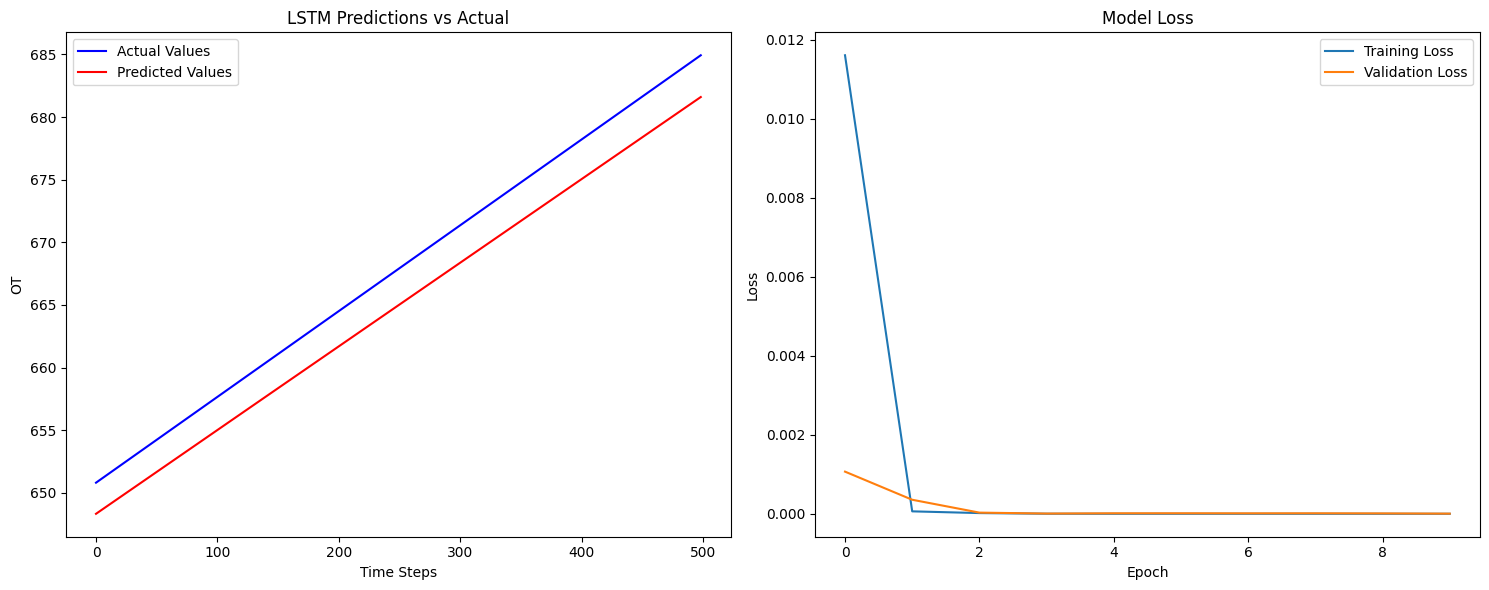

Mean Squared Error: 8.460797970293635
Mean Absolute Error: 2.898294786833003


(<Sequential name=sequential_71, built=True>,
 8.460797970293635,
 2.898294786833003)

In [234]:
scenario = scenarios[0]
df = generate_time_series(scenario, n_samples=10000)
run_lstm2(df, ['0', '1'], 'OT', val_ratio=0.2, test_ratio=0.05, look_back=1, epochs=10, batch_size=10)

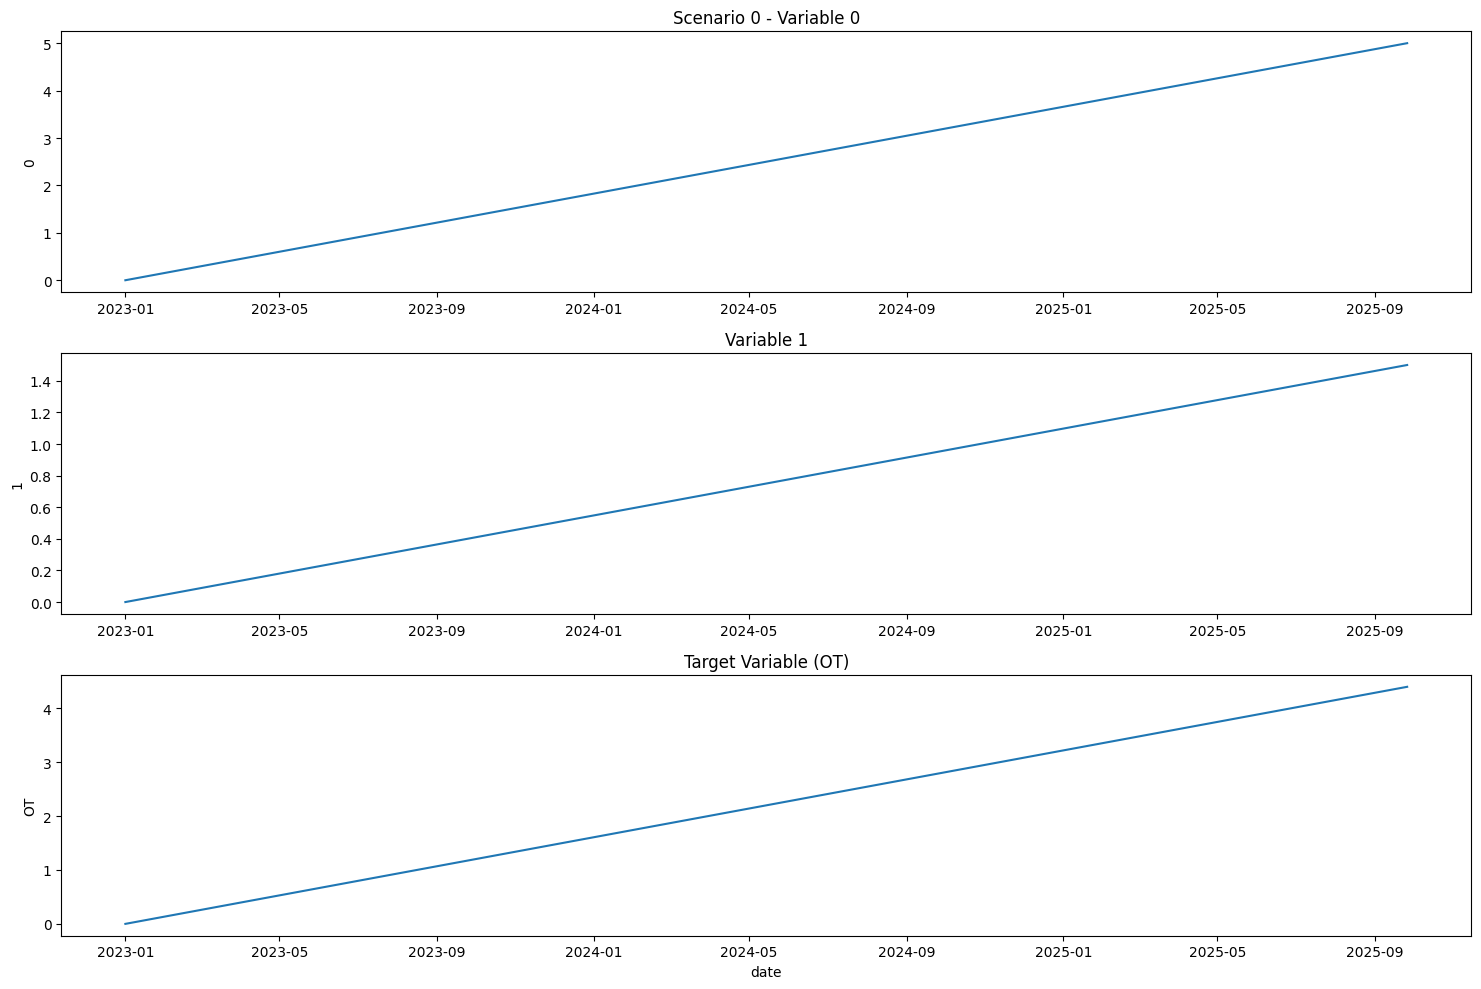

Generated data for Scenario 0


In [61]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import seaborn as sns


def generate_time_series(scenario, n_steps=1000, seed=42):
    np.random.seed(seed)
    
    time = np.arange(n_steps)
    
    if scenario == 0:
        # Simple Linear Relationships no noise
        var0 =  np.linspace(0, 5, n_steps) # np.random.normal(0, 1, n_steps)
        var1 = 0.3 * var0 #+ np.random.normal(0, 0.5, n_steps)
        ot = 0.7 * var0 + 0.6 * var1 #+ np.random.normal(0, 0.3, n_steps)

    elif scenario == 1:
        # Simple Linear Relationships
        var0 = np.random.normal(0, 1, n_steps)
        var1 = 0.3 * var0 #+ np.random.normal(0, 0.5, n_steps)
        ot = 0.7 * var0 + 0.5 * var1 #+ np.random.normal(0, 0.3, n_steps)
    
    elif scenario == 2:
        # Basic Trend with Interactions
        trend = np.linspace(0, 2, n_steps)
        var0 = trend + np.random.normal(0, 0.5, n_steps)
        var1 = 0.3 * var0 * (1 + 0.5 * trend) + np.random.normal(0, 0.5, n_steps)
        ot = (0.7 - 0.3 * trend) * var0 + 0.5 * var1 + np.random.normal(0, 0.4, n_steps)
    
    elif scenario == 3:
        # Seasonality with Phase Shifts
        seasonality0 = np.sin(2 * np.pi * time / 50)
        seasonality1 = np.sin(2 * np.pi * (time - 10) / 50)
        seasonality_ot = np.sin(2 * np.pi * (time - 20) / 50)
        
        var0 = seasonality0 + np.random.normal(0, 0.3, n_steps)
        var1 = 0.3 * var0 + 0.7 * seasonality1 + np.random.normal(0, 0.3, n_steps)
        ot = 0.5 * var0 + 0.3 * var1 + 0.5 * seasonality_ot + np.random.normal(0, 0.3, n_steps)
    
    elif scenario == 4:
        # Combined Trend, Seasonality, and Lagged Effects
        trend = np.linspace(0, 2, n_steps)
        seasonality = np.sin(2 * np.pi * time / 50)
        
        var0 = trend + seasonality + np.random.normal(0, 0.3, n_steps)
        var1 = np.zeros(n_steps)
        ot = np.zeros(n_steps)
        
        for t in range(5, n_steps):
            var1[t] = 0.3 * var0[t-2] + 0.7 * seasonality[t] + np.random.normal(0, 0.3)
            ot[t] = 0.5 * var0[t] + 0.3 * var1[t-4] + 0.5 * seasonality[t] + np.random.normal(0, 0.3)
    
    elif scenario == 5:
        # Complex Seasonality with Amplification
        daily = np.sin(2 * np.pi * time / 24)
        weekly = np.sin(2 * np.pi * time / (24 * 7))
        monthly = np.sin(2 * np.pi * time / (24 * 30))
        
        var0 = daily + 0.5 * weekly + 0.3 * monthly + np.random.normal(0, 0.3, n_steps)
        var1 = 0.5 * var0 * (1 + 0.3 * weekly) + np.random.normal(0, 0.3, n_steps)
        ot = 0.3 * var0 + 0.3 * var1 + 0.5 * (daily + weekly + monthly) + np.random.normal(0, 0.4, n_steps)
    
    else:
        raise ValueError("Scenario not implemented")
    
    #Apply smoothing to make the series more realistic
    var0 = savgol_filter(var0, 11, 3)
    var1 = savgol_filter(var1, 11, 3)
    ot = savgol_filter(ot, 11, 3)
    
    df = pd.DataFrame({
        'date': pd.date_range(start='2023-01-01', periods=n_steps, freq='D'),
        '0': var0,
        '1': var1,
        'OT': ot
    })
    
    return df

def plot_scenario(df, scenario):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    sns.lineplot(x='date', y='0', data=df)
    plt.title(f'Scenario {scenario} - Variable 0')
    plt.xlabel('')
    
    plt.subplot(3, 1, 2)
    sns.lineplot(x='date', y='1', data=df)
    plt.title('Variable 1')
    plt.xlabel('')
    
    plt.subplot(3, 1, 3)
    sns.lineplot(x='date', y='OT', data=df)
    plt.title('Target Variable (OT)')
    
    plt.tight_layout()
    plt.savefig(f'scenario_{scenario}_plot.png')
    plt.show()
    plt.close()

# Generate data for each scenario
scenario = 0
df = generate_time_series(scenario, n_steps=1000)
df.to_csv(f'scenario_{scenario}_data.csv', index=False)
plot_scenario(df, scenario)
print(f"Generated data for Scenario {scenario}")

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9599/9599 - 6s - 624us/step - loss: 3.9149e-04 - val_loss: 4.8743e-07
Epoch 2/10
9599/9599 - 5s - 486us/step - loss: 7.5208e-06 - val_loss: 1.1356e-04
Epoch 3/10
9599/9599 - 5s - 477us/step - loss: 6.9146e-06 - val_loss: 1.0533e-06
Epoch 4/10
9599/9599 - 5s - 487us/step - loss: 5.9163e-06 - val_loss: 1.6897e-06
Epoch 5/10
9599/9599 - 5s - 479us/step - loss: 7.1106e-06 - val_loss: 5.3589e-06
Epoch 6/10
9599/9599 - 5s - 482us/step - loss: 5.6374e-06 - val_loss: 4.6297e-05
Epoch 7/10
9599/9599 - 5s - 493us/step - loss: 5.9403e-06 - val_loss: 7.7962e-05
Epoch 8/10
9599/9599 - 5s - 481us/step - loss: 6.7598e-06 - val_loss: 1.2730e-05
Epoch 9/10
9599/9599 - 5s - 480us/step - loss: 6.5864e-06 - val_loss: 4.7704e-05
Epoch 10/10
9599/9599 - 5s - 479us/step - loss: 6.1008e-06 - val_loss: 9.2474e-05
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


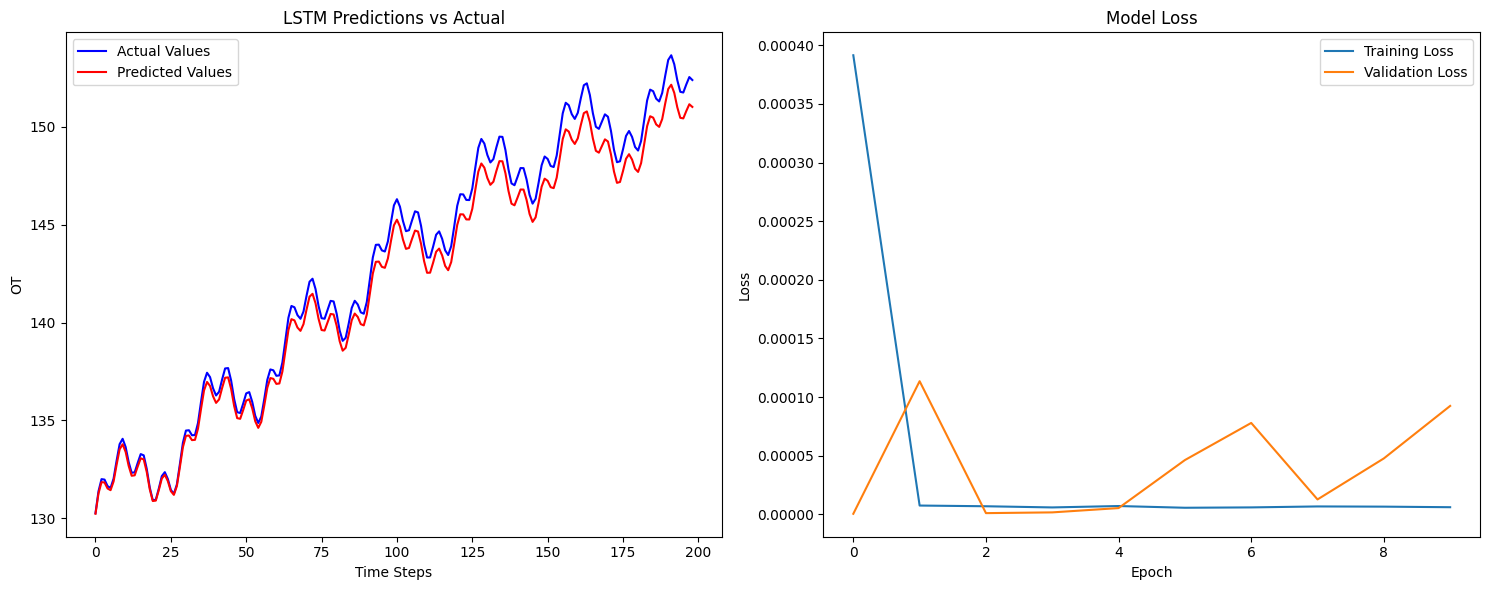

Mean Squared Error: 0.779270435011084
Mean Absolute Error: 0.7767683688949334


(<Sequential name=sequential_30, built=True>,
 0.779270435011084,
 0.7767683688949334)

In [125]:
scenario = scenarios[7]
df = generate_time_series(scenario, n_samples=10000)
run_lstm2(df, ['0', '1'], 'OT', val_ratio=0.02, test_ratio=0.02, look_back=1, epochs=10, batch_size=1)

In [70]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :-1])
        Y.append(data[i + look_back - 1, -1])
    return np.array(X), np.array(Y)
#LSTM model with validation set!

def run_lstm2(data, feature_cols, target_col, val_ratio=0.1, test_ratio=0.2, look_back=1, epochs=100, batch_size=32):
    data.index = data['date']
    data = data.drop('date', axis=1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    val_size = int(len(data) * val_ratio)
    train_data = scaled_data[:-(test_size + val_size)]
    val_data = scaled_data[-(test_size + val_size):-test_size]
    test_data = scaled_data[-test_size:]


    # Create the datasets
    X_train, Y_train = create_dataset(train_data, look_back)
    X_val, Y_val = create_dataset(val_data, look_back)
    X_test, Y_test = create_dataset(test_data, look_back)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, len(feature_cols))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the LSTM model
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_val, Y_val), callbacks=[early_stop], verbose=2)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Inverse transform the predictions and actual values
    Y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_pred), len(feature_cols))), Y_pred), axis=1))[:, -1]
    Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), len(feature_cols))), Y_test.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(15, 6))
    
    # Plot predictions vs actual
    plt.subplot(1, 2, 1)
    plt.plot(range(len(Y_test)), Y_test, label='Actual Values', color='blue')
    plt.plot(range(len(Y_pred)), Y_pred, label='Predicted Values', color='red')
    plt.title('LSTM Predictions vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel(target_col)
    plt.legend()
    
    # Plot training history
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae

# Run the updated function
#run_lstm2(data_df_simple_linear, ['0', '1'], 'OT', val_ratio=0.01, test_ratio=0.02, look_back=1, epochs=10, batch_size=1)

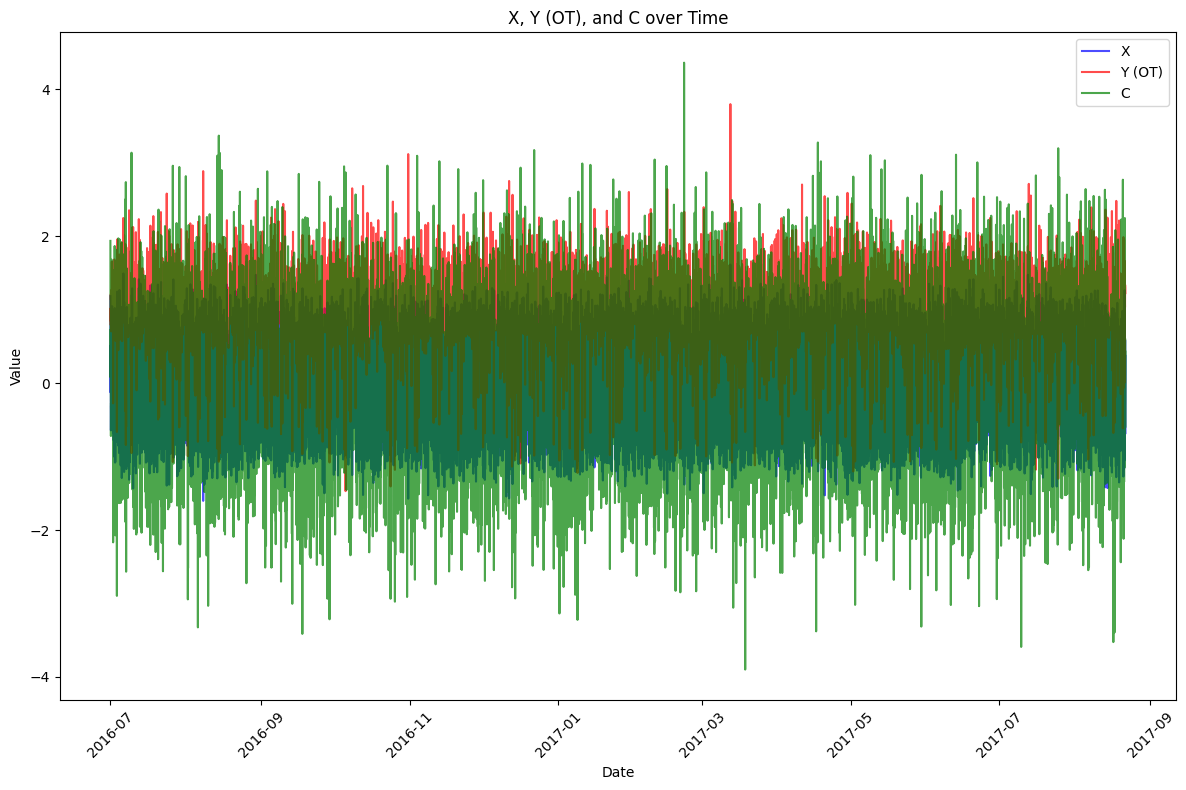

In [53]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way

    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)

    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        'OT': Y #OT is the target
    })
    return data_df




# Generate and save the data
data_df = generate_data(seq_length=10000) # Set the desired number of rows #26304 SAME as autofromer electricity dataset

# Create the plot
plt.figure(figsize=(12, 8))

# Plot X
plt.plot(data_df['date'], data_df['1'], label='X', color='blue', alpha=0.7)

# Plot Y (OT)
plt.plot(data_df['date'], data_df['OT'], label='Y (OT)', color='red', alpha=0.7)

# Plot Y (OT)
plt.plot(data_df['date'], data_df['0'], label='C', color='green', alpha=0.7)

plt.title('X, Y (OT), and C over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


TRAIN [[0.         0.44207067 0.42090145]
 [0.         0.46115433 0.39387024]
 [0.         0.39316574 0.46781941]
 ...
 [0.         0.23494675 0.62313585]
 [0.         0.40779877 0.42444157]
 [0.         0.54335411 0.22370424]]
[[0.         0.45012515 0.4171097 ]
 [0.         0.45056953 0.26807479]
 [0.         0.48936536 0.35990526]
 [0.         0.26953369 0.63098111]
 [0.         0.54769548 0.27408925]
 [0.         0.35292951 0.53740955]
 [0.         0.6868102  0.13124892]
 [0.         0.59287604 0.2303872 ]
 [0.         0.57514133 0.3305973 ]
 [0.         0.50945613 0.28306287]
 [0.         0.52968173 0.35031406]
 [0.         0.66552459 0.22341006]
 [0.         0.49238938 0.40508804]
 [0.         0.4643308  0.24327304]
 [0.         0.39992465 0.45621975]
 [0.         0.48534656 0.34228422]
 [0.         0.6271488  0.17833082]
 [0.         0.56379406 0.2842061 ]
 [0.         0.3634895  0.5986502 ]
 [0.         0.58031358 0.25863844]
 [0.         0.45634696 0.45152886]
 [0.         0.3

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 - 1s - 8ms/step - loss: 0.0392 - val_loss: 0.0230
Epoch 2/20
150/150 - 0s - 760us/step - loss: 0.0169 - val_loss: 0.0173
Epoch 3/20
150/150 - 0s - 631us/step - loss: 0.0114 - val_loss: 0.0096
Epoch 4/20
150/150 - 0s - 617us/step - loss: 0.0052 - val_loss: 0.0039
Epoch 5/20
150/150 - 0s - 604us/step - loss: 0.0033 - val_loss: 0.0035
Epoch 6/20
150/150 - 0s - 575us/step - loss: 0.0032 - val_loss: 0.0034
Epoch 7/20
150/150 - 0s - 584us/step - loss: 0.0032 - val_loss: 0.0034
Epoch 8/20
150/150 - 0s - 582us/step - loss: 0.0032 - val_loss: 0.0035
Epoch 9/20
150/150 - 0s - 621us/step - loss: 0.0032 - val_loss: 0.0034
Epoch 10/20
150/150 - 0s - 593us/step - loss: 0.0032 - val_loss: 0.0034
Epoch 11/20
150/150 - 0s - 575us/step - loss: 0.0032 - val_loss: 0.0034
Epoch 12/20
150/150 - 0s - 585us/step - loss: 0.0031 - val_loss: 0.0033
Epoch 13/20
150/150 - 0s - 575us/step - loss: 0.0031 - val_loss: 0.0033
Epoch 14/20
150/150 - 0s - 555us/step - loss: 0.0031 - val_loss: 0.0033
Epoch 15/20
15

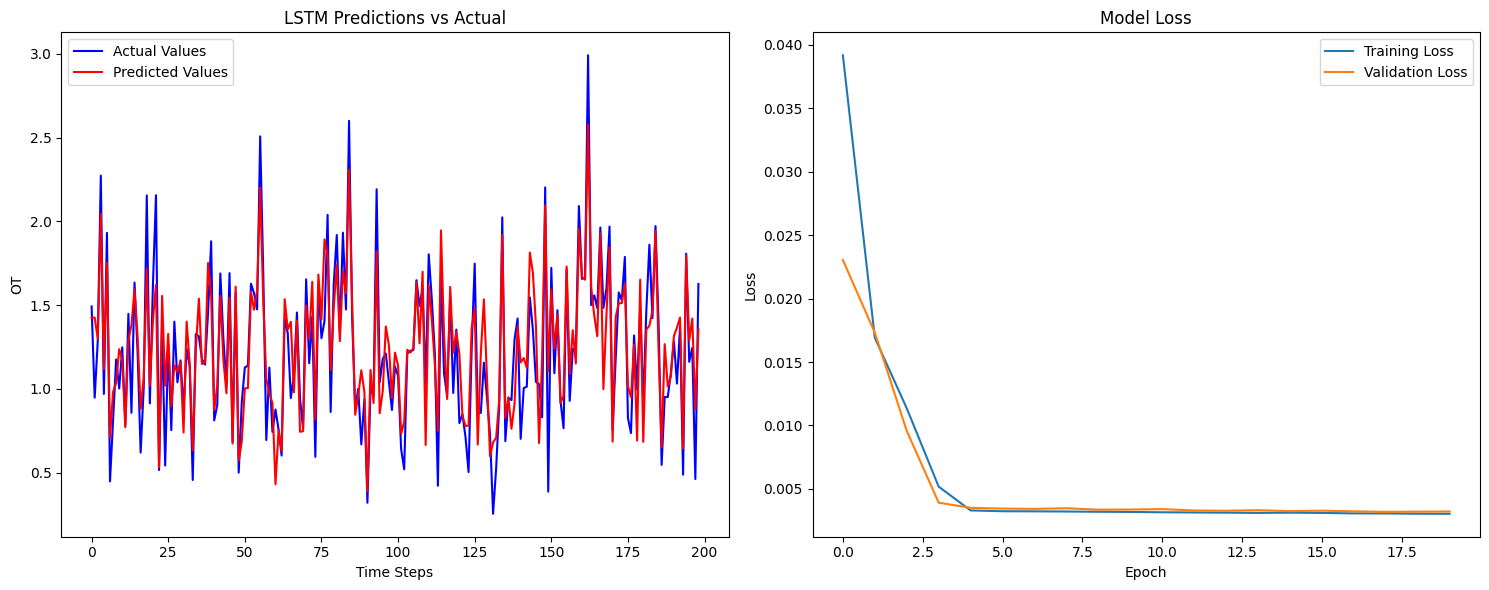

Mean Squared Error: 0.04629913081076209
Mean Absolute Error: 0.16708331874819046


(<Sequential name=sequential_7, built=True>,
 0.04629913081076209,
 0.16708331874819046)

In [23]:
data_df = generate_data(seq_length=10000)
run_lstm2(data_df, ['0', '1'], 'OT', val_ratio=0.02, test_ratio=0.02, look_back=1, epochs=20, batch_size=64)

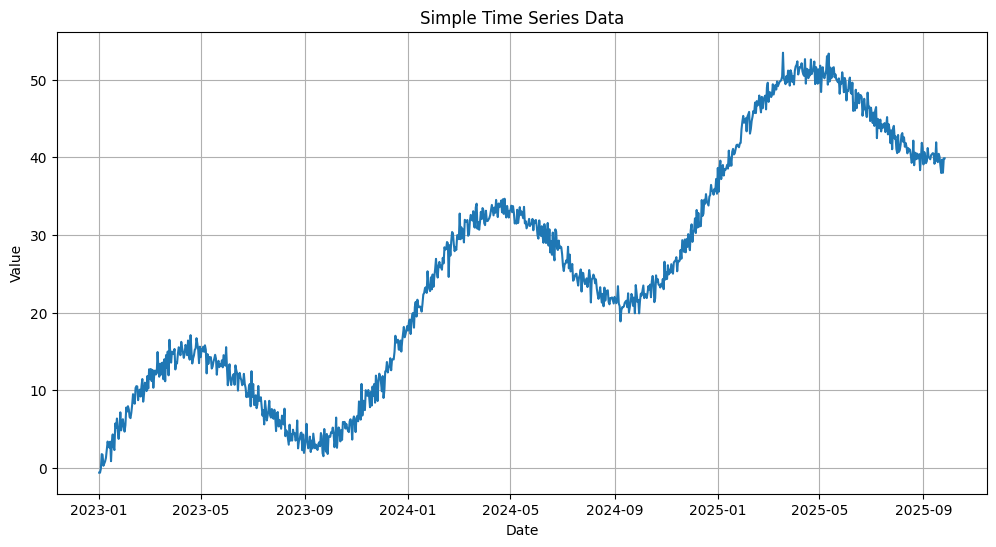

        date     value
0 2023-01-01 -0.586217
1 2023-01-02 -0.596928
2 2023-01-03 -0.081441
3 2023-01-04  1.796129
4 2023-01-05  1.722365


In [35]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def generate_simple_data(seq_length=10000):
    # Generate timestamps
    start_date = datetime.strptime('01/01/2023', '%d/%m/%Y')
    timestamps = [start_date + timedelta(days=i) for i in range(seq_length)]
    
    # Generate time index
    t = np.arange(seq_length)
    
    # Generate a simple trend
    trend = 0.05 * t
    
    # Generate seasonality (yearly cycle)
    seasonality = 10 * np.sin(2 * np.pi * t / 365)
    
    # Generate some noise
    noise = np.random.normal(0, 1, seq_length)
    
    # Combine trend, seasonality, and noise
    y = trend + seasonality + noise
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        'value': y
    })
    
    return data_df

def plot_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['date'], data['value'])
    plt.title('Simple Time Series Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Generate the data
simple_data = generate_simple_data(1000)

# Plot the data
plot_data(simple_data)

# Print the first few rows of the data
print(simple_data.head())

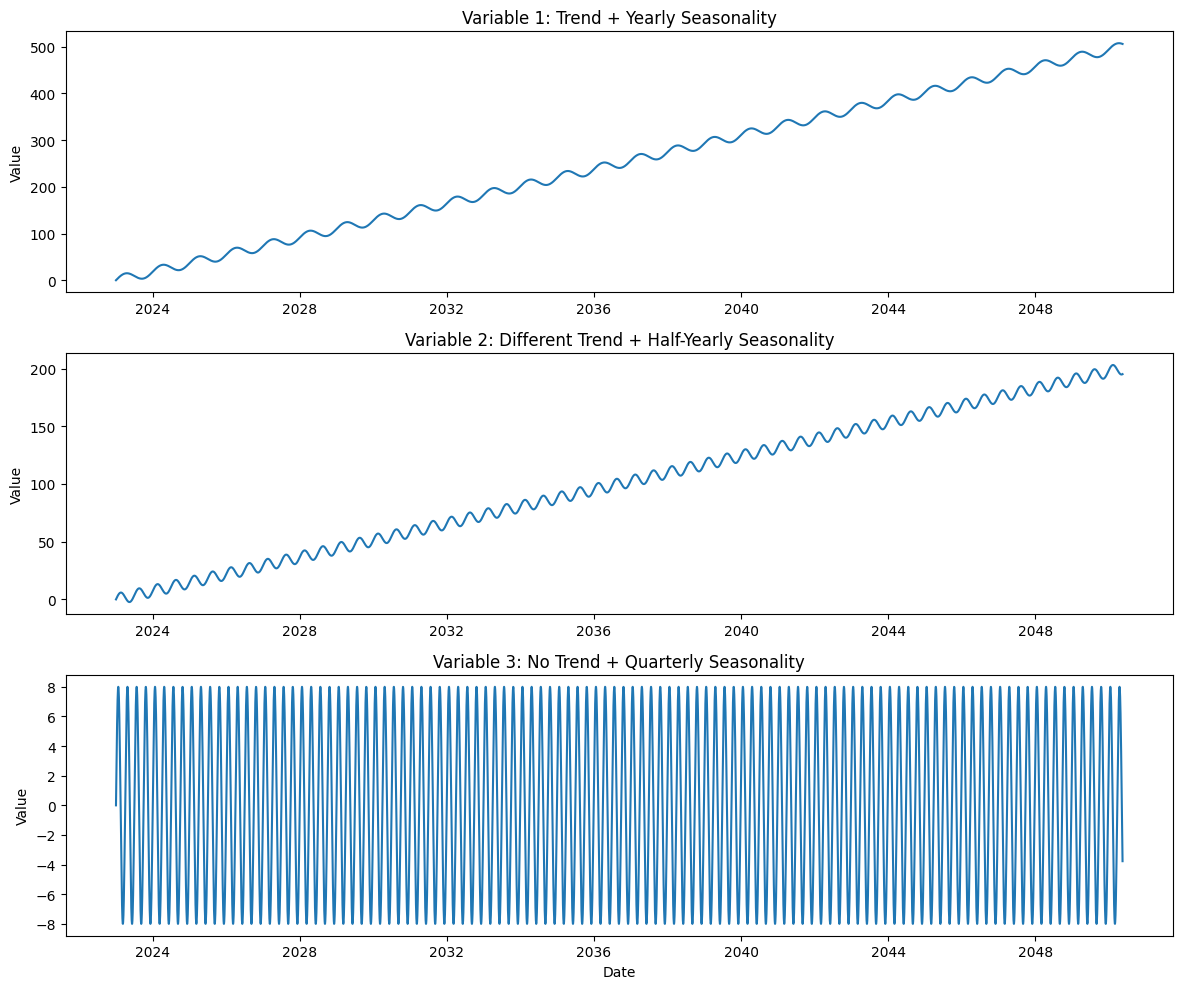

        date         0         1        OT
0 2023-01-01  0.000000  0.000000  0.000000
1 2023-01-02  0.222134  0.192108  0.550419
2 2023-01-03  0.444216  0.384012  1.098230
3 2023-01-04  0.666197  0.575508  1.640836
4 2023-01-05  0.888024  0.766394  2.175665


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
np.random.seed(42)  
def generate_simple_data(seq_length=1000):
    # Generate timestamps
    start_date = datetime.strptime('01/01/2023', '%d/%m/%Y')
    timestamps = [start_date + timedelta(days=i) for i in range(seq_length)]
    
    # Generate time index
    t = np.arange(seq_length)
    
    # Variable 1: Trend + Yearly Seasonality + Noise
    trend1 = 0.05 * t
    seasonality1 = 10 * np.sin(2 * np.pi * t / 365)
    noise1 = np.random.normal(0, 1, seq_length)
    y1 = trend1 + seasonality1 #+ noise1
    
    # Variable 2: Different Trend + Half-Yearly Seasonality + Noise
    trend2 = 0.02 * t
    seasonality2 = 5 * np.sin(4 * np.pi * t / 365)
    noise2 = np.random.normal(0, 0.5, seq_length)
    y2 = trend2 + seasonality2 #+ noise2
    
    # Variable 3: No Trend + Quarterly Seasonality + Noise
    seasonality3 = 8 * np.sin(8 * np.pi * t / 365)
    noise3 = np.random.normal(0, 2, seq_length)
    y3 = seasonality3 #+ noise3
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': y1,
        '1': y2,
        'OT': y3
    })
    
    return data_df

def plot_data(data):
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(data['date'], data['0'])
    plt.title('Variable 1: Trend + Yearly Seasonality')
    plt.ylabel('Value')
    
    plt.subplot(3, 1, 2)
    plt.plot(data['date'], data['1'])
    plt.title('Variable 2: Different Trend + Half-Yearly Seasonality')
    plt.ylabel('Value')
    
    plt.subplot(3, 1, 3)
    plt.plot(data['date'], data['OT'])
    plt.title('Variable 3: No Trend + Quarterly Seasonality')
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    plt.tight_layout()
    plt.show()

# Generate the data
simple_data = generate_simple_data(10000)
simple_data.to_csv('data_simple.csv', index=False)
# Plot the data
plot_data(simple_data)

# Print the first few rows of the data
print(simple_data.head())

TRAIN [[0.         0.0161489  0.50423096]
 [0.00480774 0.01314586 0.56412159]
 [0.0017997  0.01666496 0.51336408]
 ...
 [0.95821155 0.92846679 0.82760729]
 [0.95916994 0.93023681 0.78409929]
 [0.95979384 0.93130884 0.85003385]]
[[0.94047441 0.93637165 0.53365049]
 [0.94222538 0.93800651 0.7216126 ]
 [0.94866175 0.94199015 0.73715984]
 [0.94838136 0.93928323 0.4651649 ]
 [0.94650652 0.93546615 0.64991074]
 [0.94727998 0.94083483 0.62929193]
 [0.94679392 0.93932826 0.47170172]
 [0.9458075  0.93625068 0.58904585]
 [0.94832228 0.94362665 0.5596774 ]
 [0.94499575 0.93410458 0.55228421]
 [0.94629026 0.93326544 0.44841016]
 [0.94687396 0.94101152 0.47091699]
 [0.94617068 0.9378711  0.52050571]
 [0.95393481 0.93665945 0.40845189]
 [0.9485893  0.93720915 0.49501669]
 [0.95101621 0.9407919  0.2903667 ]
 [0.95205537 0.93897201 0.41364891]
 [0.95107761 0.94000278 0.39390237]
 [0.95448139 0.9406841  0.37023755]
 [0.95062459 0.93880427 0.18768332]
 [0.94944308 0.9392835  0.38069787]
 [0.95335094 0.9

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 - 2s - 4ms/step - loss: 0.0466 - val_loss: 0.0448
Epoch 2/20
478/478 - 1s - 3ms/step - loss: 0.0422 - val_loss: 0.0447
Epoch 3/20
478/478 - 1s - 3ms/step - loss: 0.0422 - val_loss: 0.0450
Epoch 4/20
478/478 - 1s - 3ms/step - loss: 0.0420 - val_loss: 0.0447
Epoch 5/20
478/478 - 1s - 3ms/step - loss: 0.0420 - val_loss: 0.0448
Epoch 6/20
478/478 - 1s - 3ms/step - loss: 0.0420 - val_loss: 0.0459
Epoch 7/20
478/478 - 1s - 3ms/step - loss: 0.0420 - val_loss: 0.0449
Epoch 8/20
478/478 - 1s - 3ms/step - loss: 0.0419 - val_loss: 0.0451
Epoch 9/20
478/478 - 1s - 3ms/step - loss: 0.0419 - val_loss: 0.0447
Epoch 10/20
478/478 - 2s - 4ms/step - loss: 0.0419 - val_loss: 0.0448
Epoch 11/20
478/478 - 2s - 3ms/step - loss: 0.0417 - val_loss: 0.0448
Epoch 12/20
478/478 - 2s - 3ms/step - loss: 0.0418 - val_loss: 0.0448
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


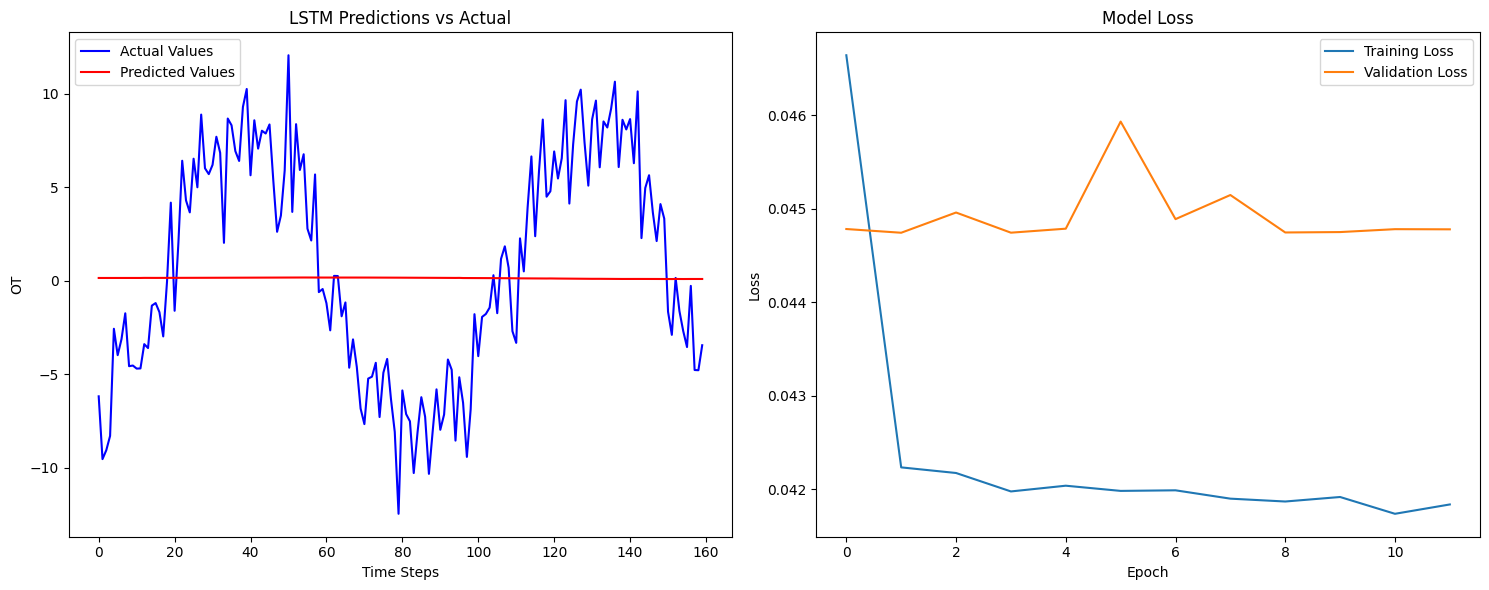

Mean Squared Error: 35.69873855602697
Mean Absolute Error: 5.250966824288251


(<Sequential name=sequential_15, built=True>,
 35.69873855602697,
 5.250966824288251)

In [40]:
data_df = generate_simple_data(seq_length=10000)
run_lstm2(data_df, ['0', '1'], 'OT', val_ratio=0.02, test_ratio=0.02, look_back=40, epochs=20, batch_size=20)

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0733 - val_loss: 0.0042
Epoch 2/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 3/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 4/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 5/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 6/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 7/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 8/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 9/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 10/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 11/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 12/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

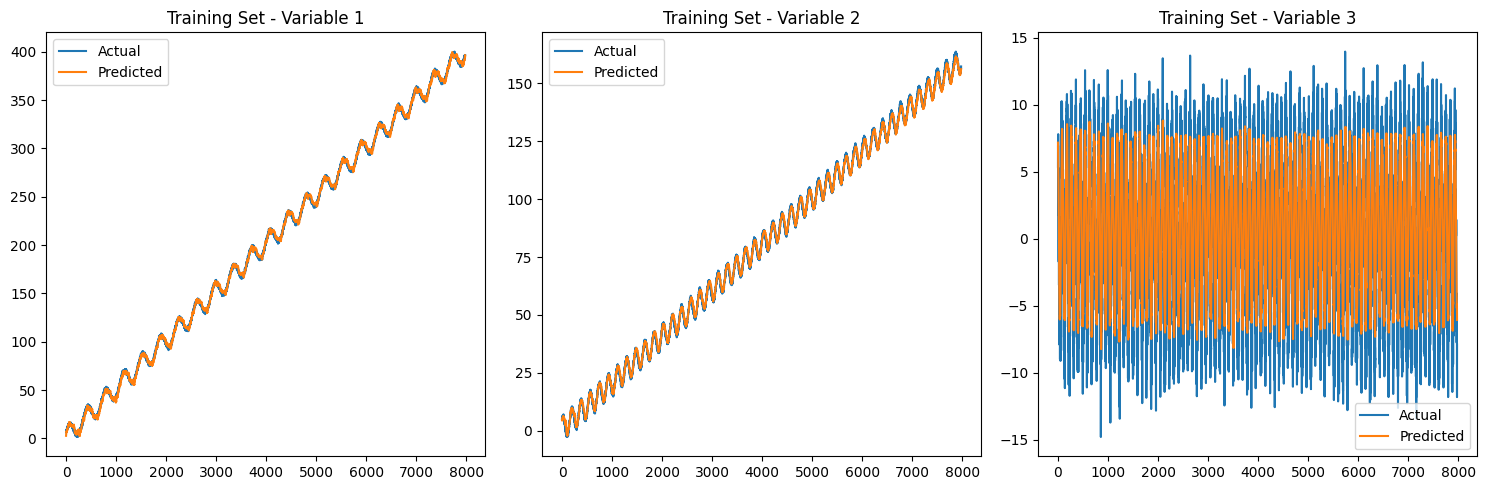

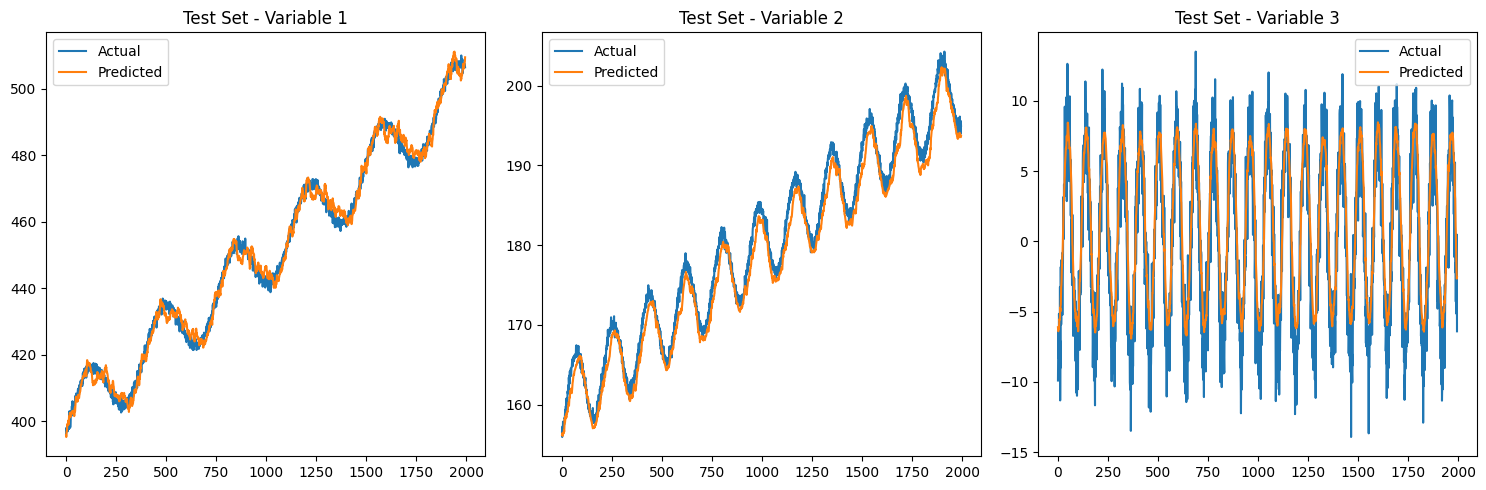

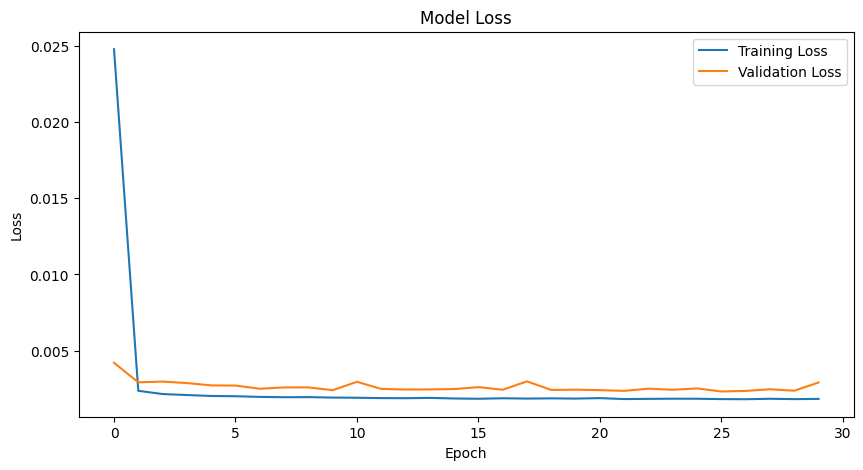

In [43]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam



# Generate data
data = generate_simple_data(10000)

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['0', '1', 'OT']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, :])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 3)),
    Dense(3)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.01, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Prepare actual values
train_actual = scaler.inverse_transform(y_train)
test_actual = scaler.inverse_transform(y_test)

# Plot results
def plot_predictions(actual, predictions, title):
    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.plot(actual[:, i], label='Actual')
        plt.plot(predictions[:, i], label='Predicted')
        plt.title(f'{title} - Variable {i+1}')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_predictions(train_actual, train_predictions, 'Training Set')
plot_predictions(test_actual, test_predictions, 'Test Set')

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## dataset with 3 variables with trend and patterns 



In [14]:
seq_length=1000
np.random.normal(loc=0, scale=0.2, size=1000)

array([-5.66263974e-01, -9.57911516e-02,  1.21644591e-01, -2.44372079e-02,
        4.39509042e-02,  1.55228283e-01, -1.66163363e-01, -1.82525472e-01,
       -1.76581304e-01, -2.47307924e-01,  2.75846825e-02, -3.13260788e-01,
        3.45551953e-02, -2.04511712e-01, -2.20408918e-01,  4.66569507e-02,
        7.15279634e-02, -1.90677385e-01, -3.77339393e-02,  3.04546974e-01,
        1.12998826e-01, -7.94179662e-03, -8.94054126e-02,  3.38729503e-01,
        9.35840042e-02,  1.96362026e-01,  4.23846402e-01, -2.46783404e-01,
       -1.34945890e-01, -2.63046458e-01,  2.62309817e-01,  1.90308796e-01,
        3.99465851e-02, -4.44197299e-02,  9.59563024e-03, -2.02701123e-01,
        1.27070296e-01,  6.18242997e-02,  5.48280206e-02, -1.84783318e-01,
       -1.08476717e-01, -2.55810062e-02, -1.23010165e-01,  5.11834486e-02,
       -4.79003683e-02,  3.08020059e-02, -2.06550973e-02,  1.53383540e-01,
       -8.86304735e-02, -2.32996590e-02, -3.38466491e-01,  1.22330477e-01,
        1.54568402e-01, -

In [15]:
def data_with_trend_patterns(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    
    # Generate patterns and trend
    daily_pattern = np.sin(2 * np.pi * np.arange(seq_length) / 24)
    weekly_pattern = np.sin(2 * np.pi * np.arange(seq_length) / (24 * 7))
    linear_trend = np.linspace(0, 2, seq_length)
    
    # Generate X influenced by C, with patterns and trend
    X = np.sin(C) + 0.5 * daily_pattern + 0.3 * weekly_pattern + 0.1 * linear_trend #+ np.random.normal(loc=0, scale=0.2, size=seq_length)
    
    # Generate Y influenced by X and C, with patterns and trend
    Y = np.square(X) + np.cos(C) + 0.4 * daily_pattern + 0.2 * weekly_pattern + 0.2 * linear_trend #+ np.random.normal(loc=0, scale=0.2, size=seq_length)
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        'OT': Y  # OT is the target
    })
    
    return data_df

TRAIN [[0.73019191 0.74574999 0.35903408]
 [0.63903176 0.73036424 0.46729774]
 [0.79156318 0.78124901 0.36579636]
 ...
 [0.20172152 0.31940203 0.17293509]
 [0.4033486  0.30464285 0.42543135]
 [0.50399391 0.52021116 0.44405962]]
[[0.5617294  0.80351061 0.74767397]
 [0.4584585  0.56834806 0.50891333]
 [0.56046747 0.74797257 0.64965456]
 [0.4980972  0.58317392 0.50080754]
 [0.29224587 0.32484281 0.31444401]
 [0.41556809 0.35751115 0.42163904]
 [0.51038222 0.49995347 0.42653915]
 [0.48688017 0.42071014 0.41232218]
 [0.52895234 0.48511563 0.39988192]
 [0.64530375 0.67503125 0.40951548]
 [0.51302476 0.42862472 0.39390746]
 [0.46669583 0.33600171 0.41924674]
 [0.47000175 0.35354495 0.41638881]
 [0.37005916 0.22534035 0.44374273]
 [0.52640066 0.51483447 0.42137895]
 [0.56452019 0.62367203 0.47175524]
 [0.3822848  0.32485902 0.41328191]
 [0.4499431  0.45529962 0.44158161]
 [0.4493306  0.48417357 0.45513791]
 [0.3323212  0.38071152 0.36631447]
 [0.58842353 0.80820936 0.72204044]
 [0.60443242 0.8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 - 1s - 4ms/step - loss: 0.0584 - val_loss: 0.0152
Epoch 2/20
150/150 - 0s - 588us/step - loss: 0.0140 - val_loss: 0.0146
Epoch 3/20
150/150 - 0s - 567us/step - loss: 0.0137 - val_loss: 0.0144
Epoch 4/20
150/150 - 0s - 559us/step - loss: 0.0133 - val_loss: 0.0138
Epoch 5/20
150/150 - 0s - 546us/step - loss: 0.0129 - val_loss: 0.0139
Epoch 6/20
150/150 - 0s - 547us/step - loss: 0.0125 - val_loss: 0.0135
Epoch 7/20
150/150 - 0s - 543us/step - loss: 0.0121 - val_loss: 0.0129
Epoch 8/20
150/150 - 0s - 546us/step - loss: 0.0117 - val_loss: 0.0138
Epoch 9/20
150/150 - 0s - 545us/step - loss: 0.0113 - val_loss: 0.0124
Epoch 10/20
150/150 - 0s - 545us/step - loss: 0.0109 - val_loss: 0.0124
Epoch 11/20
150/150 - 0s - 548us/step - loss: 0.0106 - val_loss: 0.0117
Epoch 12/20
150/150 - 0s - 548us/step - loss: 0.0100 - val_loss: 0.0108
Epoch 13/20
150/150 - 0s - 548us/step - loss: 0.0089 - val_loss: 0.0097
Epoch 14/20
150/150 - 0s - 556us/step - loss: 0.0076 - val_loss: 0.0098
Epoch 15/20
15

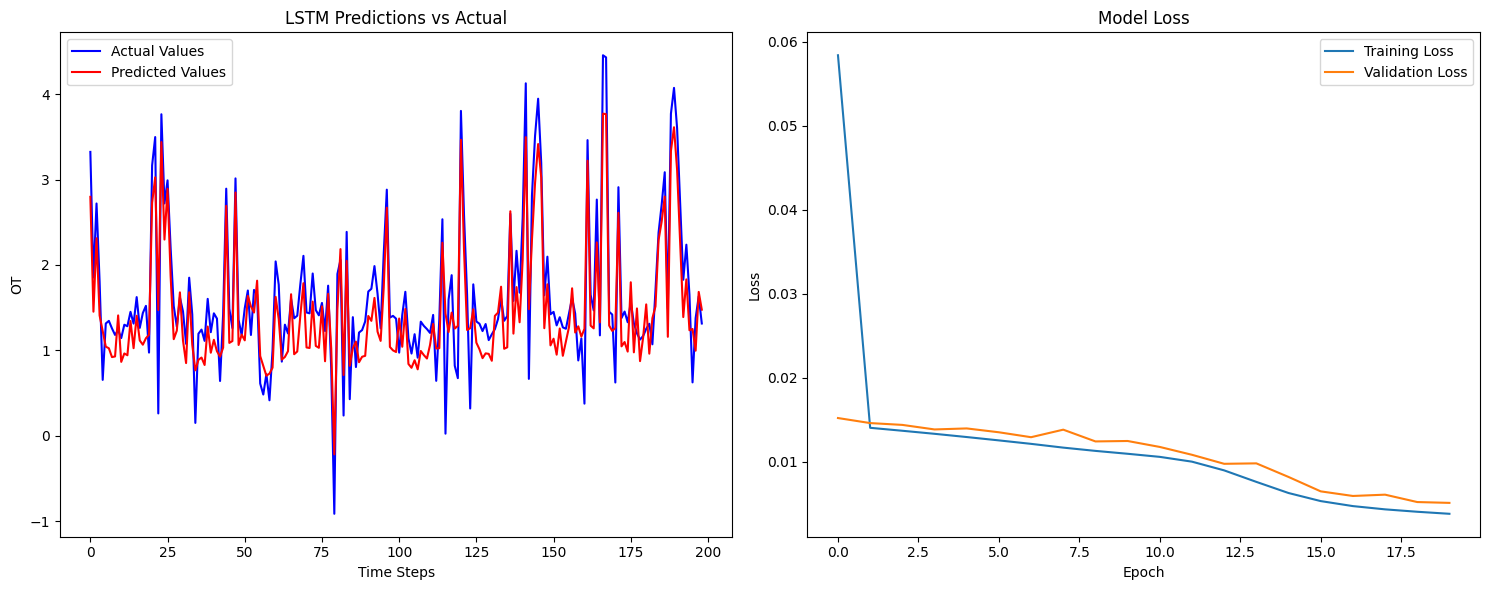

Mean Squared Error: 0.1423663157413059
Mean Absolute Error: 0.3300425720640459


(<Sequential name=sequential_5, built=True>,
 0.1423663157413059,
 0.3300425720640459)

In [16]:
df = data_with_trend_patterns(seq_length=10000)
run_lstm2(df, ['0', '1'], 'OT', val_ratio=0.02, test_ratio=0.02, look_back=1, epochs=20, batch_size=64)

In [9]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :-1])
        Y.append(data[i + look_back - 1, -1])
    return np.array(X), np.array(Y)
#LSTM model with validation set!

def run_lstm2(data, feature_cols, target_col, val_ratio=0.1, test_ratio=0.2, look_back=1, epochs=100, batch_size=32):
    data.index = data['date']
    data = data.drop('date', axis=1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    val_size = int(len(data) * val_ratio)
    train_data = scaled_data[:-(test_size + val_size)]
    val_data = scaled_data[-(test_size + val_size):-test_size]
    test_data = scaled_data[-test_size:]
    print("TRAIN",train_data)

    print(test_data)

    # Create the datasets
    X_train, Y_train = create_dataset(train_data, look_back)
    X_val, Y_val = create_dataset(val_data, look_back)
    X_test, Y_test = create_dataset(test_data, look_back)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, len(feature_cols))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the LSTM model
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_val, Y_val), callbacks=[early_stop], verbose=2)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Inverse transform the predictions and actual values
    Y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_pred), len(feature_cols))), Y_pred), axis=1))[:, -1]
    Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), len(feature_cols))), Y_test.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(15, 6))
    
    # Plot predictions vs actual
    plt.subplot(1, 2, 1)
    plt.plot(range(len(Y_test)), Y_test, label='Actual Values', color='blue')
    plt.plot(range(len(Y_pred)), Y_pred, label='Predicted Values', color='red')
    plt.title('LSTM Predictions vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel(target_col)
    plt.legend()
    
    # Plot training history
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae

# Run the updated function
#run_lstm2(data_df_simple_linear, ['0', '1'], 'OT', val_ratio=0.01, test_ratio=0.02, look_back=1, epochs=10, batch_size=1)

In [3]:
run_lstm2(data_df_simple_linear, ['0', '1'], 'OT', look_back=1, test_ratio=0.2, epochs=30, batch_size=1)

NameError: name 'run_lstm2' is not defined

In [17]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)

    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        'OT': Y #OT is the target
    })
    return data_df

# Set the desired number of rows


# Generate and save the data
data_df = generate_data(seq_length=1000) # Set the desired number of rows #26304 SAME as autofromer electricity dataset
data_df_simple_linear = data_df.copy()
#data_df.to_csv('data_causal_1.csv', index=False)


def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :-1])
        Y.append(data[i + look_back - 1, -1])
    return np.array(X), np.array(Y)

def run_lstm2(data, feature_cols, target_col, test_ratio=0.2, look_back=1, epochs=100, batch_size=1):
    """
    Run LSTM on the provided dataset.

    Parameters:
    data (DataFrame): The input data containing features and target.
    feature_cols (list): The names of the columns to be used as features.
    target_col (str): The name of the column to be used as the target.
    test_ratio (float): The proportion of the dataset to include in the test split.
    look_back (int): The number of previous time steps to use as input for predicting the next time step.
    epochs (int): The number of epochs to train the LSTM model.
    batch_size (int): The batch size for training the LSTM model.

    Returns:
    model: The trained LSTM model.
    mse: Mean Squared Error of the model on the test set.
    mae: Mean Absolute Error of the model on the test set.
    """
    data.index = data['date']
    data = data.drop('date', axis=1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    train_data = scaled_data[:-test_size]
    test_data = scaled_data[-test_size:]
    # print(train_data)
    # print(test_data)
    # Create the training and testing datasets
    X_train, Y_train = create_dataset(train_data, look_back)
    X_test, Y_test = create_dataset(test_data, look_back)
   
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, len(feature_cols))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the LSTM model
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Inverse transform the predictions and actual values
    Y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_pred), len(feature_cols))), Y_pred), axis=1))[:, -1]
    Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), len(feature_cols))), Y_test.reshape(-1, 1)), axis=1))[:, -1]
    print(Y_pred)
    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(Y_test)), Y_test, label='Actual Values', color='blue')
    plt.plot(range(len(Y_pred)), Y_pred, label='Predicted Values', color='red')
    plt.title('LSTM Predictions vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel(target_col)
    plt.legend()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae



In [7]:
run_lstm2(data_df_simple_linear, ['0', 'OT'], '1', look_back=1, test_ratio=0.2, epochs=30, batch_size=1)


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


799/799 - 1s - 1ms/step - loss: 0.0354
Epoch 2/30
799/799 - 0s - 573us/step - loss: 0.0152
Epoch 3/30
799/799 - 0s - 475us/step - loss: 0.0150
Epoch 4/30
799/799 - 0s - 479us/step - loss: 0.0147
Epoch 5/30
799/799 - 0s - 503us/step - loss: 0.0147
Epoch 6/30
799/799 - 0s - 503us/step - loss: 0.0147
Epoch 7/30
799/799 - 0s - 495us/step - loss: 0.0145
Epoch 8/30
799/799 - 0s - 475us/step - loss: 0.0142
Epoch 9/30
799/799 - 0s - 475us/step - loss: 0.0140
Epoch 10/30
799/799 - 0s - 476us/step - loss: 0.0139
Epoch 11/30
799/799 - 0s - 478us/step - loss: 0.0136
Epoch 12/30
799/799 - 0s - 479us/step - loss: 0.0133
Epoch 13/30
799/799 - 0s - 473us/step - loss: 0.0130
Epoch 14/30
799/799 - 0s - 472us/step - loss: 0.0126
Epoch 15/30
799/799 - 0s - 470us/step - loss: 0.0119
Epoch 16/30
799/799 - 0s - 474us/step - loss: 0.0116
Epoch 17/30
799/799 - 0s - 488us/step - loss: 0.0112
Epoch 18/30
799/799 - 0s - 478us/step - loss: 0.0111
Epoch 19/30
799/799 - 0s - 469us/step - loss: 0.0102
Epoch 20/30
799

NameError: name 'plt' is not defined

In [24]:
def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)

    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        'OT': Y #OT is the target
    })
    return data_df

# Set the desired number of rows


# Generate and save the data
data_df = generate_data(seq_length=10000) # Set the desired number of rows #26304 SAME as autofromer electricity dataset
data_df_simple_linear = data_df.copy()

In [13]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

def run_lstm2(data, feature_cols, target_col, val_ratio=0.1, test_ratio=0.2, look_back=1, epochs=100, batch_size=32):
    data.index = data['date']
    data = data.drop('date', axis=1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    val_size = int(len(data) * val_ratio)
    train_data = scaled_data[:-(test_size + val_size)]
    val_data = scaled_data[-(test_size + val_size):-test_size]
    test_data = scaled_data[-test_size:]
    print("TRAIN",train_data)

    print(test_data)

    # Create the datasets
    X_train, Y_train = create_dataset(train_data, look_back)
    X_val, Y_val = create_dataset(val_data, look_back)
    X_test, Y_test = create_dataset(test_data, look_back)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, len(feature_cols))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the LSTM model
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_val, Y_val), callbacks=[early_stop], verbose=2)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Inverse transform the predictions and actual values
    Y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_pred), len(feature_cols))), Y_pred), axis=1))[:, -1]
    Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), len(feature_cols))), Y_test.reshape(-1, 1)), axis=1))[:, -1]

    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(15, 6))
    
    # Plot predictions vs actual
    plt.subplot(1, 2, 1)
    plt.plot(range(len(Y_test)), Y_test, label='Actual Values', color='blue')
    plt.plot(range(len(Y_pred)), Y_pred, label='Predicted Values', color='red')
    plt.title('LSTM Predictions vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel(target_col)
    plt.legend()
    
    # Plot training history
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae

# Run the updated function
run_lstm2(data_df_simple_linear, ['0', '1'], 'OT', val_ratio=0.01, test_ratio=0.02, look_back=1, epochs=30, batch_size=1)

TRAIN [[0.46121105 0.34551744 0.57337239]
 [0.70069666 0.83575047 0.65193187]
 [0.31149245 0.13666486 0.65533629]
 ...
 [0.24723056 0.16708482 0.49341923]
 [0.465211   0.55125589 0.55460975]
 [0.65616922 0.75317599 0.70067173]]
[[0.37841341 0.21512812 0.63387458]
 [0.86668724 0.78702212 0.26920847]
 [0.6967492  0.80914888 0.54049266]
 [0.34179509 0.19152021 0.62347194]
 [0.35925986 0.17577613 0.75710195]
 [0.57130056 0.73885416 0.70463598]
 [0.55092537 0.62970977 0.65745311]
 [0.62092794 0.79297161 0.65922097]
 [0.35098162 0.20226535 0.56031996]
 [0.43568929 0.37492406 0.62237516]
 [0.58551383 0.72821845 0.70794817]
 [0.8704619  0.80073553 0.41505808]
 [0.69438095 0.88622357 0.67303132]
 [0.29661168 0.20737107 0.53550146]
 [0.45390637 0.34031535 0.74107547]
 [0.63629015 0.67462811 0.64115219]
 [0.64161113 0.81332948 0.76718   ]
 [0.6180797  0.64411928 0.52873343]
 [0.47410065 0.4705186  0.62382869]
 [0.25457834 0.0846348  0.56222323]]
Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


969/969 - 1s - 1ms/step - loss: 0.0322 - val_loss: 0.0285
Epoch 2/30
969/969 - 0s - 385us/step - loss: 0.0154 - val_loss: 0.0267
Epoch 3/30
969/969 - 0s - 315us/step - loss: 0.0156 - val_loss: 0.0278
Epoch 4/30
969/969 - 0s - 319us/step - loss: 0.0156 - val_loss: 0.0266
Epoch 5/30
969/969 - 0s - 364us/step - loss: 0.0154 - val_loss: 0.0262
Epoch 6/30
969/969 - 0s - 324us/step - loss: 0.0152 - val_loss: 0.0251
Epoch 7/30
969/969 - 0s - 317us/step - loss: 0.0148 - val_loss: 0.0252
Epoch 8/30
969/969 - 0s - 307us/step - loss: 0.0147 - val_loss: 0.0237
Epoch 9/30
969/969 - 0s - 364us/step - loss: 0.0146 - val_loss: 0.0307
Epoch 10/30
969/969 - 0s - 367us/step - loss: 0.0143 - val_loss: 0.0239
Epoch 11/30
969/969 - 0s - 360us/step - loss: 0.0140 - val_loss: 0.0225
Epoch 12/30
969/969 - 0s - 319us/step - loss: 0.0135 - val_loss: 0.0219
Epoch 13/30
969/969 - 0s - 374us/step - loss: 0.0130 - val_loss: 0.0225
Epoch 14/30
969/969 - 0s - 363us/step - loss: 0.0126 - val_loss: 0.0219
Epoch 15/30
96

NameError: name 'plt' is not defined

In [18]:
data = data_df_simple_linear

val_ratio=0.1
test_ratio=0.2
test_size = int(len(data) * test_ratio)
val_size = int(len(data) * val_ratio)
train_data = data[:-(test_size + val_size)]
val_data = data[-(test_size + val_size):-test_size]
test_data = data[-test_size:]
#print("TRAIN",train_data)
#print("VAL",val_data)
print("TEST",test_data)


TEST                                    date         0         1        OT
date                                                                 
2016-08-03 10:00:00 2016-08-03 10:00:00  1.673214  1.086075  1.205118
2016-08-03 11:00:00 2016-08-03 11:00:00 -0.748750 -0.456155  0.704329
2016-08-03 12:00:00 2016-08-03 12:00:00  0.408754  0.180164  1.102646
2016-08-03 13:00:00 2016-08-03 13:00:00 -1.678613 -1.168200  1.724445
2016-08-03 14:00:00 2016-08-03 14:00:00 -1.137036 -0.749681  0.648926
...                                 ...       ...       ...       ...
2016-08-11 13:00:00 2016-08-11 13:00:00 -0.269456 -0.049290  0.985567
2016-08-11 14:00:00 2016-08-11 14:00:00  0.288951  0.340458  0.989547
2016-08-11 15:00:00 2016-08-11 15:00:00  1.138933  1.222019  1.716864
2016-08-11 16:00:00 2016-08-11 16:00:00  2.844640  0.621542 -0.833021
2016-08-11 17:00:00 2016-08-11 17:00:00  0.070215  0.538814  1.349374

[200 rows x 4 columns]


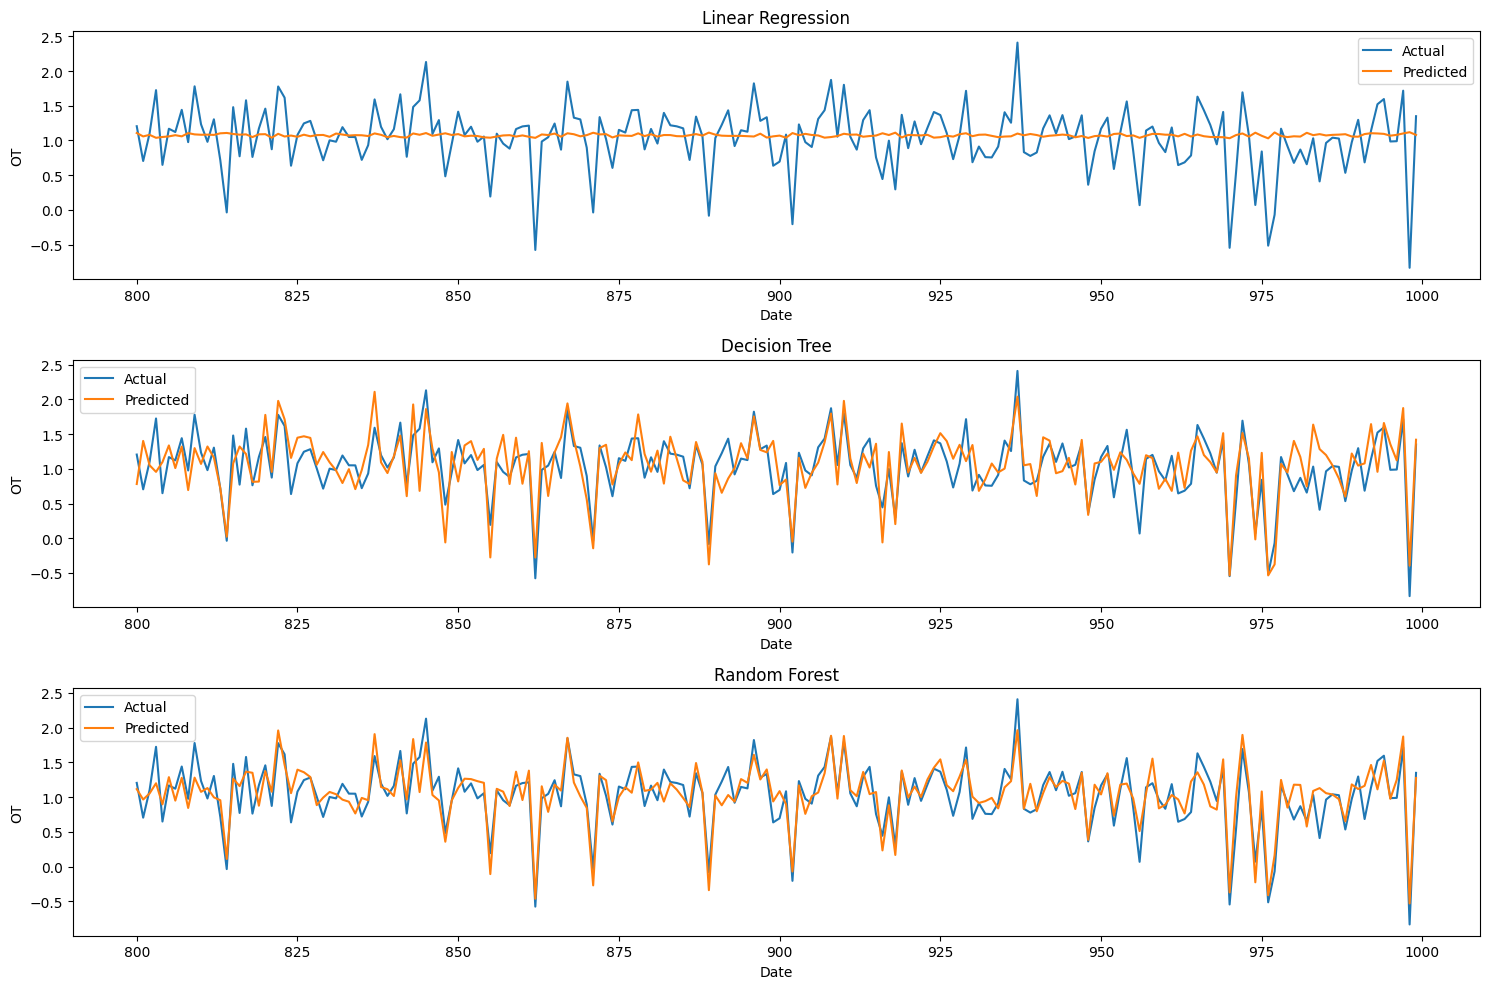

Linear Regression MSE: 0.2128918464773703
Decision Tree MSE: 0.09984461419548897
Random Forest MSE: 0.051400924416213155


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Splitting the data into features (X) and target (y)

X = data_df[['0', '1']]
y = data_df['OT']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)



# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Linear Regression
plt.subplot(3, 1, 1)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, lr_predictions, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()

# Plot Decision Tree
plt.subplot(3, 1, 2)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, dt_predictions, label='Predicted')
plt.title('Decision Tree')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()

# Plot Random Forest
plt.subplot(3, 1, 3)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_predictions, label='Predicted')
plt.title('Random Forest')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()

plt.tight_layout()
plt.show()

# Print MSE for each model
print(f'Linear Regression MSE: {lr_mse}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


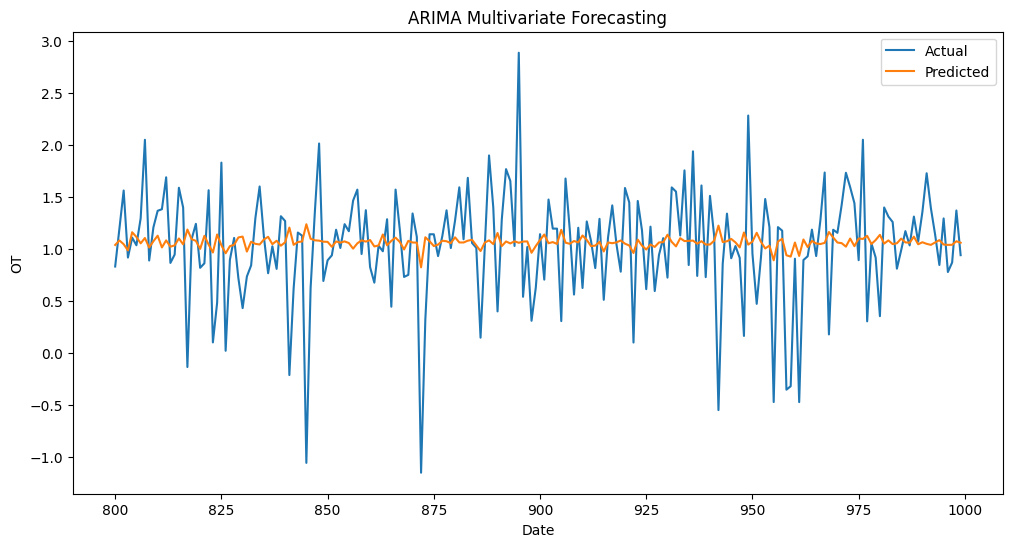

ARIMA Multivariate MSE: 0.2929610073389021


In [11]:
# Splitting the data into features (X) and target (y)

X = data_df[['0', '1']]
y = data_df['OT']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(5, 0, 5), exog=X_train)
arima_model_fit = arima_model.fit()

# Make predictions on the test set
arima_predictions = arima_model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, exog=X_test)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, arima_predictions, label='Predicted')
plt.title('ARIMA Multivariate Forecasting')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()
plt.show()

# Calculate MSE
arima_mse = mean_squared_error(y_test, arima_predictions)
print(f'ARIMA Multivariate MSE: {arima_mse}')




AttributeError: 'VARResults' object has no attribute 'y'

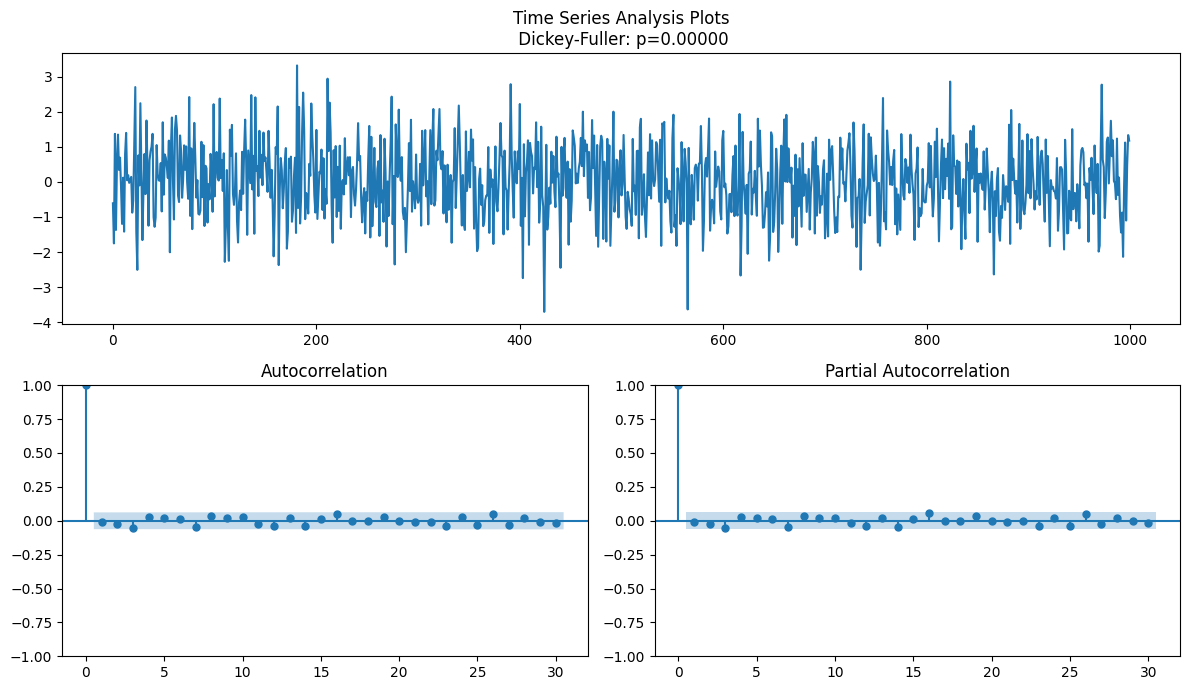

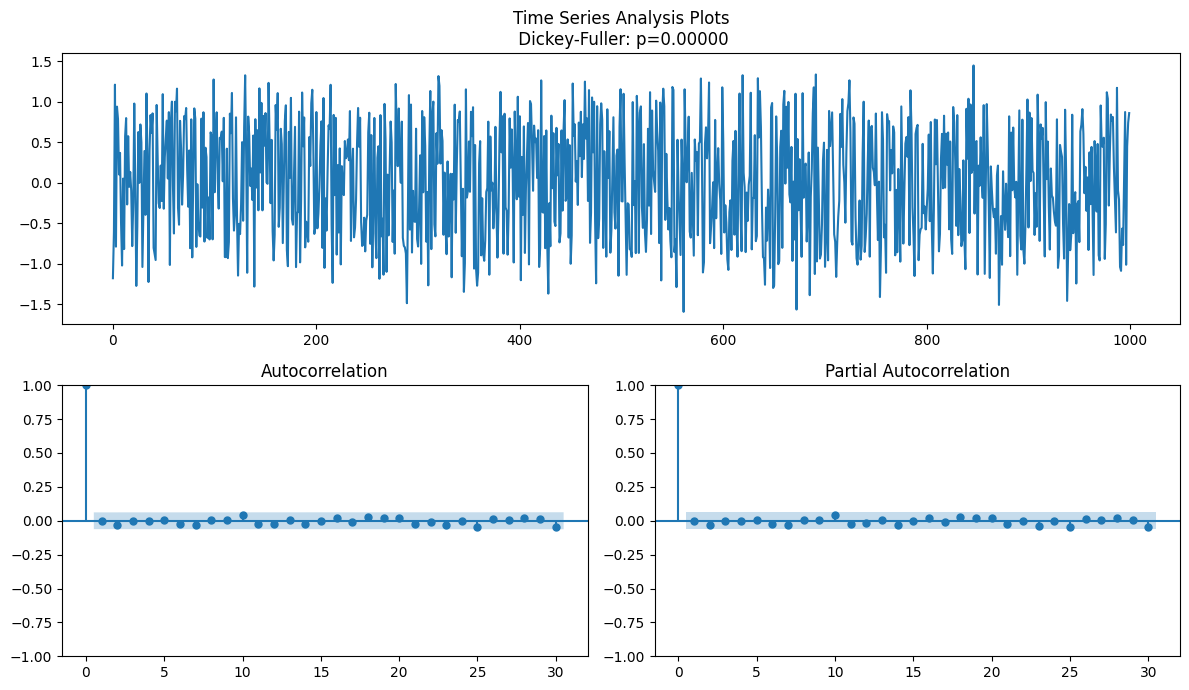

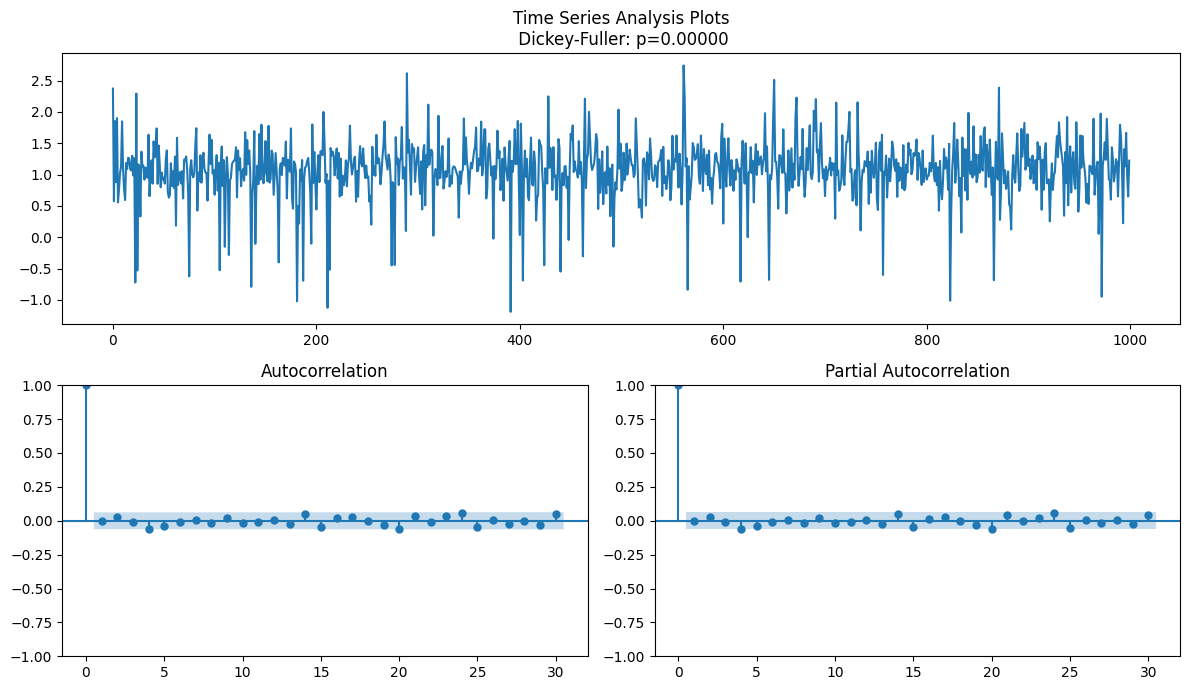

In [15]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt

# Ensure the time series is stationary
def check_stationarity(y, lags=None, figsize=(12, 7), savelag=False):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    # Create figure and layout
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    # Plot time series data
    y.plot(ax=ts_ax)
    p_value = adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    
    # Plot ACF and PACF
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
    
# Check stationarity
for col in data_df[["0","1","OT"]].columns:
    check_stationarity(data_df[col])

# Fit the VAR model
model = VAR(X_train)
model_fit = model.fit()

# Make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(X_test))

# Converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[X.columns])
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

# Check performance
mse = mean_squared_error(X_test, pred)
print(f'Multivariate ARIMA MSE: {mse}')

In [11]:
data_df[["0","1","OT"]]

0         1        OT
0   -0.612185 -1.177736  2.372230
1   -1.754466 -0.607831  0.576464
2    1.366541  1.208766  1.852367
3   -1.371645 -0.788366  0.881308
4    0.594497  0.938069  1.901697
..        ...       ...       ...
995  1.118971  0.871327  1.131812
996 -1.103282 -1.011488  1.664979
997  0.460831  0.446864  0.995158
998  1.331215  0.739468  0.651569
999  1.173101  0.858466  1.221906

[1000 rows x 3 columns]

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Combine features and target for VAR model
var_data = pd.concat([X, y], axis=1)

# Normalize the data (important for time series models)
scaler = StandardScaler()
var_data_scaled = scaler.fit_transform(var_data)

# Split the dataset into training and testing sets (without shuffling)
train_size = int(len(var_data_scaled) * 0.8)
train, test = var_data_scaled[:train_size], var_data_scaled[train_size:]

# Fit the VAR model
model = VAR(train)
fitted_model = model.fit(maxlags=15, ic='aic')

# Forecasting
forecast_steps = len(test)
forecast_input = train[-fitted_model.k_ar:]
forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)

# Inverse transform the forecasted data
forecast = scaler.inverse_transform(forecast)

# Extracting the forecasted OT values
forecasted_OT = forecast[:, -1]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data_df['date'][-forecast_steps:], data_df['OT'][-forecast_steps:], label='True OT')
plt.plot(data_df['date'][-forecast_steps:], forecasted_OT, label='Forecasted OT')
plt.xlabel('Date')
plt.ylabel('OT')
plt.title('True vs Forecasted OT')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :-1])
        Y.append(data[i + look_back - 1, -1])
    return np.array(X), np.array(Y)

def run_lstm(data, feature_cols, target_col, test_ratio=0.2, look_back=1, epochs=100, batch_size=1):
    """
    Run LSTM on the provided dataset.

    Parameters:
    data (DataFrame): The input data containing features and target.
    feature_cols (list): The names of the columns to be used as features.
    target_col (str): The name of the column to be used as the target.
    test_ratio (float): The proportion of the dataset to include in the test split.
    look_back (int): The number of previous time steps to use as input for predicting the next time step.
    epochs (int): The number of epochs to train the LSTM model.
    batch_size (int): The batch size for training the LSTM model.

    Returns:
    model: The trained LSTM model.
    mse: Mean Squared Error of the model on the test set.
    mae: Mean Absolute Error of the model on the test set.
    """
    data.index = data['date']
    data = data.drop('date', axis=1)

    # # Scale the data
    # scaler = MinMaxScaler(feature_range=(0, 1))
    # scaled_data = scaler.fit_transform(data)

    # # Split the data by index for a time series prediction context
    # test_size = int(len(data) * test_ratio)
    # train_data = scaled_data[:-test_size]
    # test_data = scaled_data[-test_size:]
    
    # print(train_data)
    # print(test_data)
    # Create the training and testing datasets
    X_train, Y_train = create_dataset(train_data, look_back)
    X_test, Y_test = create_dataset(test_data, look_back)
   
    X = data_df[['0', '1']]
    Y = data_df['OT']


    # Splitting the dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=42)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, len(feature_cols))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the LSTM model
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Inverse transform the predictions and actual values
    Y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_pred), len(feature_cols))), Y_pred), axis=1))[:, -1]
    Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), len(feature_cols))), Y_test.reshape(-1, 1)), axis=1))[:, -1]
    print(Y_pred)
    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(Y_test)), Y_test, label='Actual Values', color='blue')
    plt.plot(range(len(Y_pred)), Y_pred, label='Predicted Values', color='red')
    plt.title('LSTM Predictions vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel(target_col)
    plt.legend()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae


In [32]:
run_lstm(data_df_simple_linear, ['0', '1'], 'OT', look_back=1, test_ratio=0.2, epochs=60, batch_size=1)



InvalidIndexError: (slice(0, 1, None), slice(None, -1, None))

all variable [0, 1] voor X: 
Linear Regression MSE: 0.22596815860169617
Decision Tree MSE: 0.08345689152374837
Random Forest MSE: 0.04748034151091915

all variable [0, 1, OT_shifted] voor X: OT_shifted is -1 tijdstap geleden
Linear Regression MSE: 0.22596815860169617
Decision Tree MSE: 0.08345689152374837
Random Forest MSE: 0.04748034151091915

only variable [0] voor X: 
Linear Regression MSE: 0.22550026778437918
Decision Tree MSE: 0.24233300762162757
Random Forest MSE: 0.1755615383471964

Linear Regression MSE: 0.23509316431669414
Decision Tree MSE: 0.3952387920609545
Random Forest MSE: 0.3157703730963764

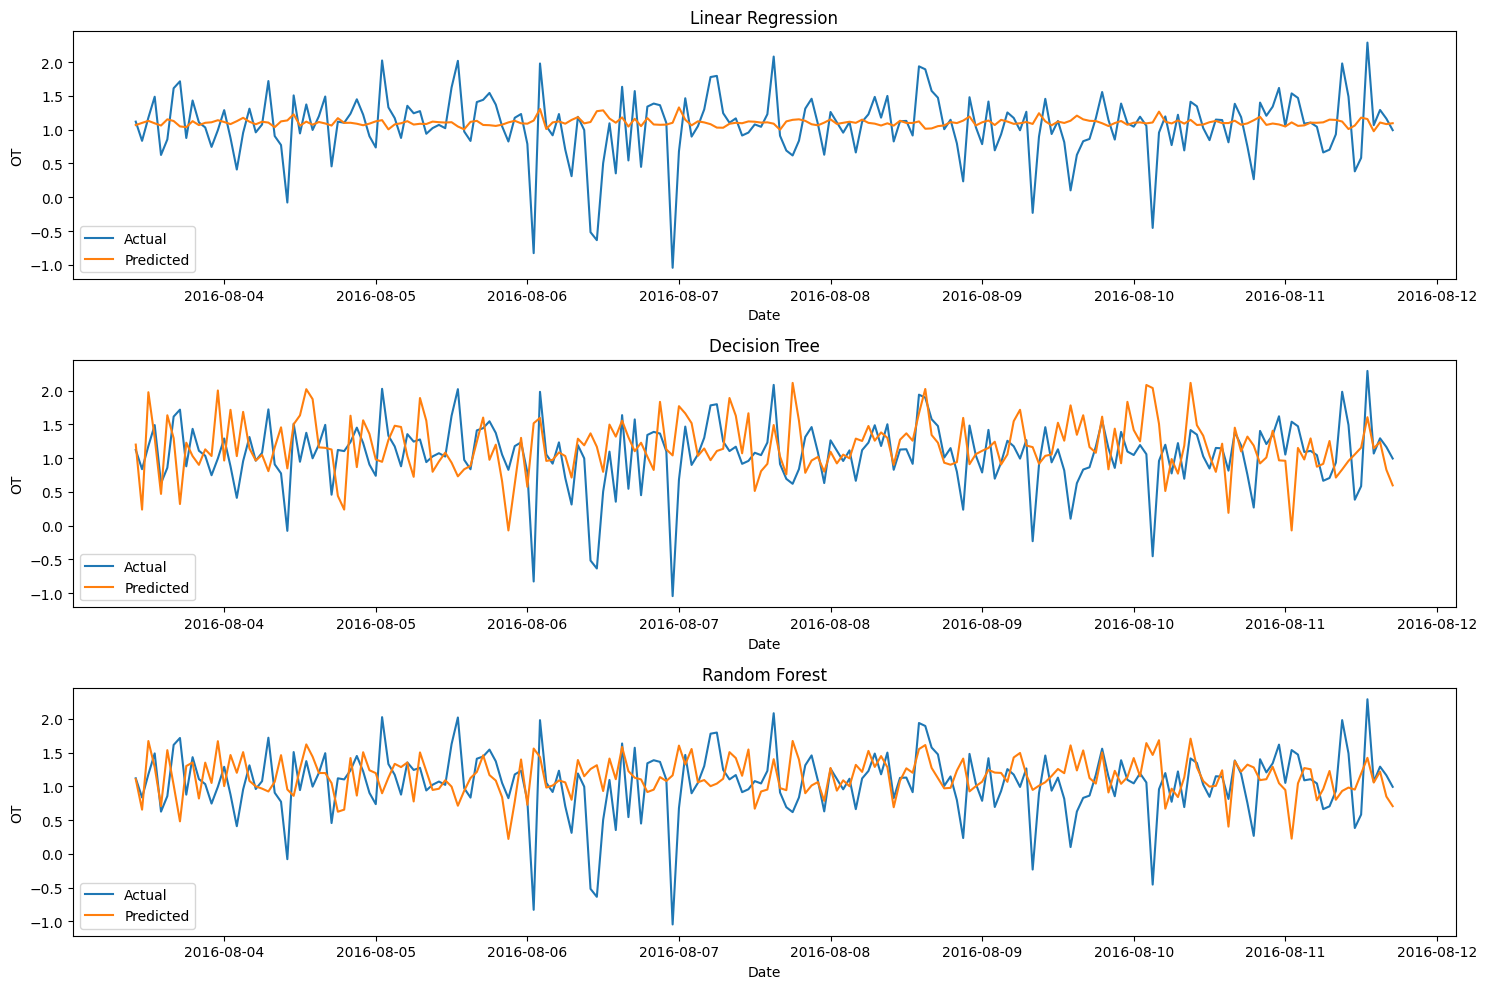

Linear Regression MSE: 0.23509316431669414
Decision Tree MSE: 0.3952387920609545
Random Forest MSE: 0.3157703730963764


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming data_df is already defined and has columns 'date', '0', '1', 'OT'
# Sample data definition (uncomment if needed)
# data_df = pd.DataFrame({
#     'date': pd.date_range(start='1/1/2020', periods=1000),
#     '0': np.random.rand(1000),
#     '1': np.random.rand(1000),
#     'OT': np.random.rand(1000)
# })

# # Convert 'date' column to datetime and set as index
# data_df['date'] = pd.to_datetime(data_df['date'])
# data_df.set_index('date', inplace=True)

# Use only the 'OT' variable for both features (X) and target (y)
data_df['OT_shifted'] = data_df['OT'].shift(1)
data_df.dropna(inplace=True)

X = data_df[['OT_shifted']]
y = data_df['OT']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Linear Regression
plt.subplot(3, 1, 1)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, lr_predictions, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()

# Plot Decision Tree
plt.subplot(3, 1, 2)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, dt_predictions, label='Predicted')
plt.title('Decision Tree')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()

# Plot Random Forest
plt.subplot(3, 1, 3)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_predictions, label='Predicted')
plt.title('Random Forest')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()

plt.tight_layout()
plt.show()

# Print MSE for each model
print(f'Linear Regression MSE: {lr_mse}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')

In [8]:
data_df

date         0         1        OT
0   2016-07-01 02:00:00 -0.193155 -0.033270  0.844933
1   2016-07-01 03:00:00  0.688639  0.333115  0.795692
2   2016-07-01 04:00:00  0.054121  0.130133  1.169683
3   2016-07-01 05:00:00  0.967422  0.884724  1.193270
4   2016-07-01 06:00:00 -0.291693 -0.091411  1.143292
..                  ...       ...       ...       ...
995 2016-08-11 13:00:00  0.813011  1.158218  2.289877
996 2016-08-11 14:00:00 -1.020942 -0.722340  1.067081
997 2016-08-11 15:00:00 -0.816033 -0.861180  1.292389
998 2016-08-11 16:00:00 -0.475830 -0.595558  1.163984
999 2016-08-11 17:00:00 -0.466082 -0.198782  0.993430

[1000 rows x 4 columns]

MAE Naive: 0.4796471309729965
MAE Moving Average: 0.3872640271601877
MAE Linear Regression: 0.31877066045065433


/var/folders/qh/hds51vmn44lck_7290w4m88r0000gn/T/ipykernel_31059/2452324738.py:53: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_df['OT_LR'].iloc[1:] = predictions
/var/folders/qh/hds51vmn44lck_7290w4m88r0000gn/T/ipykernel_31059/2452324

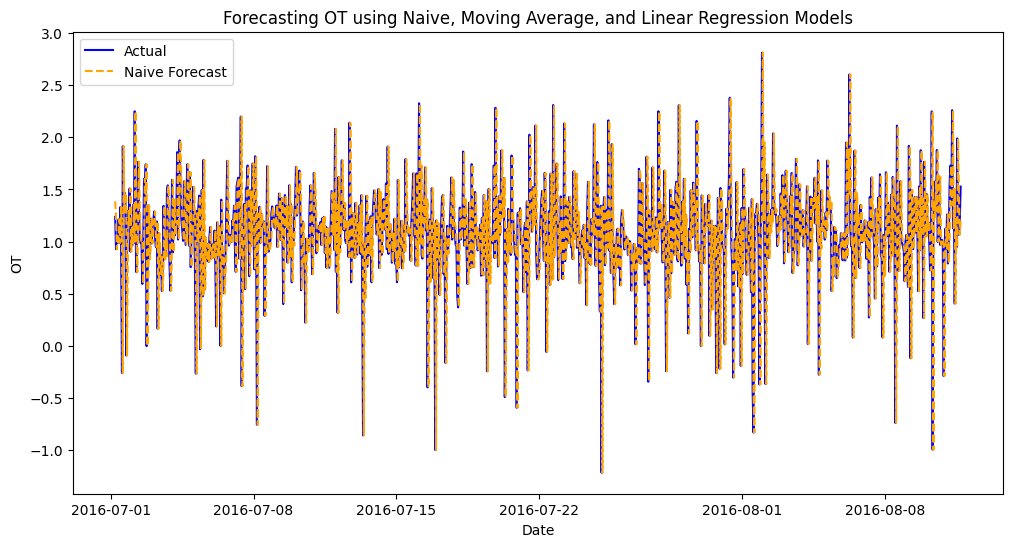

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)

    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        'C': C,
        'X': X,
        'OT': Y # OT is the target
    })
    return data_df

# Generate data
data_df = generate_data(seq_length=1000)

# Naive model
data_df['OT_Naive'] = data_df['OT'].shift(1)

# Moving Average model
window_size = 3
data_df['OT_Moving_Avg'] = data_df['OT'].rolling(window=window_size).mean().shift(1)

# Linear Regression model
data_df['timestamp'] = data_df['date'].apply(lambda x: x.timestamp())
train_data = data_df[['timestamp', 'C', 'X']].iloc[:-1]  # Features
train_target = data_df['OT'].iloc[:-1]  # Target

model = LinearRegression()
model.fit(train_data, train_target)

test_data = data_df[['timestamp', 'C', 'X']].iloc[1:]  # Features for prediction
predictions = model.predict(test_data)

# Align the predictions with the original DataFrame
data_df['OT_LR'] = np.nan
data_df['OT_LR'].iloc[1:] = predictions

# Remove the first row with NaN values due to shifting and rolling
data_df = data_df.dropna()

# Evaluation
mae_naive = mean_absolute_error(data_df['OT'], data_df['OT_Naive'])
mae_moving_avg = mean_absolute_error(data_df['OT'], data_df['OT_Moving_Avg'])
mae_lr = mean_absolute_error(data_df['OT'], data_df['OT_LR'])

print(f'MAE Naive: {mae_naive}')
print(f'MAE Moving Average: {mae_moving_avg}')
print(f'MAE Linear Regression: {mae_lr}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data_df['date'], data_df['OT'], label='Actual', color='blue')
plt.plot(data_df['date'], data_df['OT_Naive'], label='Naive Forecast', linestyle='--', color='orange')
#plt.plot(data_df['date'], data_df['OT_Moving_Avg'], label='Moving Average Forecast', linestyle='--', color='green')
#plt.plot(data_df['date'], data_df['OT_LR'], label='Linear Regression Forecast', linestyle='--', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('OT')
plt.title('Forecasting OT using Naive, Moving Average, and Linear Regression Models')
plt.show()


In [42]:
data_df_simple_linear


date         0         1        OT
0    2016-07-01 02:00:00 -0.461399 -0.445201  1.093635
1    2016-07-01 03:00:00  0.173346  0.172479  1.014762
2    2016-07-01 04:00:00  0.340831  0.334271  1.054214
3    2016-07-01 05:00:00 -0.883012 -0.772655  1.231822
4    2016-07-01 06:00:00  0.077622  0.077544  1.003002
...                  ...       ...       ...       ...
9995 2017-08-21 13:00:00 -0.864367 -0.760685  1.227763
9996 2017-08-21 14:00:00  0.981457  0.831308  1.246885
9997 2017-08-21 15:00:00  0.219219  0.217467  1.023360
9998 2017-08-21 16:00:00 -0.281840 -0.278123  1.037898
9999 2017-08-21 17:00:00  0.343990  0.337246  1.055152

[10000 rows x 4 columns]

In [15]:
data = data_df_simple_linear.copy()


In [10]:
data


date         0         1        OT
date                                                                 
2016-07-01 02:00:00 2016-07-01 02:00:00 -0.610732 -0.309208  0.914866
2016-07-01 03:00:00 2016-07-01 03:00:00 -0.568896 -0.701237  0.950364
2016-07-01 04:00:00 2016-07-01 04:00:00 -0.150256 -0.188027  1.214198
2016-07-01 05:00:00 2016-07-01 05:00:00 -1.380547 -1.410523  2.303945
2016-07-01 06:00:00 2016-07-01 06:00:00 -0.038929 -0.042325  0.727463
...                                 ...       ...       ...       ...
2016-08-11 13:00:00 2016-08-11 13:00:00  1.105269  0.828534  1.316627
2016-08-11 14:00:00 2016-08-11 14:00:00 -1.386794 -1.011952  1.266995
2016-08-11 15:00:00 2016-08-11 15:00:00 -0.357882 -0.284872  1.310216
2016-08-11 16:00:00 2016-08-11 16:00:00  1.279350  0.931459  1.333897
2016-08-11 17:00:00 2016-08-11 17:00:00  1.992958  0.795598  0.111510

[1000 rows x 4 columns]

In [ ]:
data.index = data['date']
data = data.drop('date', axis=1)
test_ratio=0.2
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data by index for a time series prediction context
test_size = int(len(data) * test_ratio)
train_data = scaled_data[:-test_size]
test_data = scaled_data[-test_size:]
# print(train_data)
# print(test_data)
# Create the training and testing datasets
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15999/15999 - 8s - 526us/step - loss: 0.0213
Epoch 2/10
15999/15999 - 8s - 493us/step - loss: 0.0136
Epoch 3/10
15999/15999 - 7s - 468us/step - loss: 0.0027
Epoch 4/10
15999/15999 - 7s - 464us/step - loss: 1.5771e-04
Epoch 5/10
15999/15999 - 7s - 456us/step - loss: 1.4995e-04
Epoch 6/10
15999/15999 - 7s - 462us/step - loss: 1.4851e-04
Epoch 7/10
15999/15999 - 7s - 457us/step - loss: 1.3735e-04
Epoch 8/10
15999/15999 - 7s - 457us/step - loss: 1.3946e-04
Epoch 9/10
15999/15999 - 7s - 465us/step - loss: 1.2442e-04
Epoch 10/10
15999/15999 - 7s - 461us/step - loss: 1.2658e-04
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[1.21343836 1.18553104 1.2496689  ... 1.24330777 1.09769542 0.96436588]


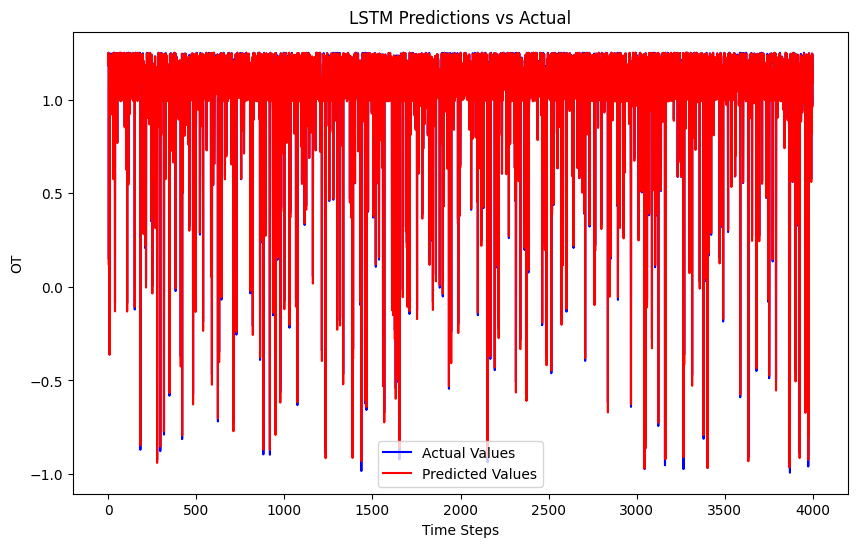

Mean Squared Error: 9.155980121889738e-05
Mean Absolute Error: 0.006053316589480101


(<Sequential name=sequential_13, built=True>,
 9.155980121889738e-05,
 0.006053316589480101)

In [50]:
run_lstm(data_df_simple_linear, ['0', '1'], 'OT', look_back=1, test_ratio=0.2, epochs=10, batch_size=1)



X_train shape: (799, 1, 2), Y_train shape: (799,)
X_test shape: (199, 1, 2), Y_test shape: (199,)
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


799/799 - 1s - 2ms/step - loss: 0.0243 - val_loss: 0.0193
Epoch 2/10
799/799 - 0s - 552us/step - loss: 0.0131 - val_loss: 0.0211
Epoch 3/10
799/799 - 0s - 555us/step - loss: 0.0132 - val_loss: 0.0190
Epoch 4/10
799/799 - 1s - 642us/step - loss: 0.0128 - val_loss: 0.0220
Epoch 5/10
799/799 - 0s - 554us/step - loss: 0.0134 - val_loss: 0.0194
Epoch 6/10
799/799 - 0s - 550us/step - loss: 0.0129 - val_loss: 0.0198
Epoch 7/10
799/799 - 0s - 549us/step - loss: 0.0129 - val_loss: 0.0194
Epoch 8/10
799/799 - 0s - 547us/step - loss: 0.0132 - val_loss: 0.0190
Epoch 9/10
799/799 - 1s - 641us/step - loss: 0.0128 - val_loss: 0.0193
Epoch 10/10
799/799 - 0s - 557us/step - loss: 0.0133 - val_loss: 0.0194
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Y_pred (first 5): [1.11949184 1.1095654  1.1320564  1.10255371 1.11492904]
Y_test (first 5): [-0.6783669   1.13094258  1.59268305  1.1635247   0.8482804 ]


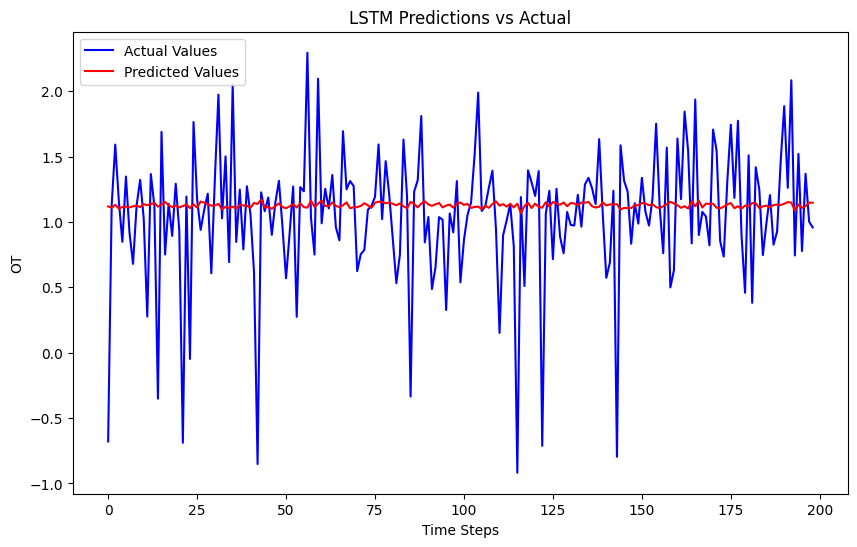

Mean Squared Error: 0.2718316861369947
Mean Absolute Error: 0.35200160672998243


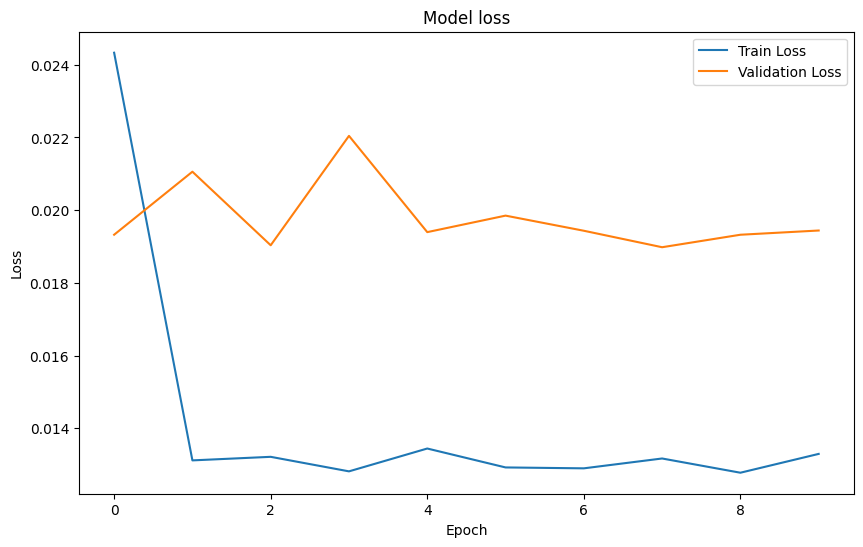

(<Sequential name=sequential_7, built=True>,
 0.2718316861369947,
 0.35200160672998243)

In [30]:
run_lstm(data_df_simple_linear, ['0', '1'], 'OT', look_back=1, test_ratio=0.2, epochs=10, batch_size=1)


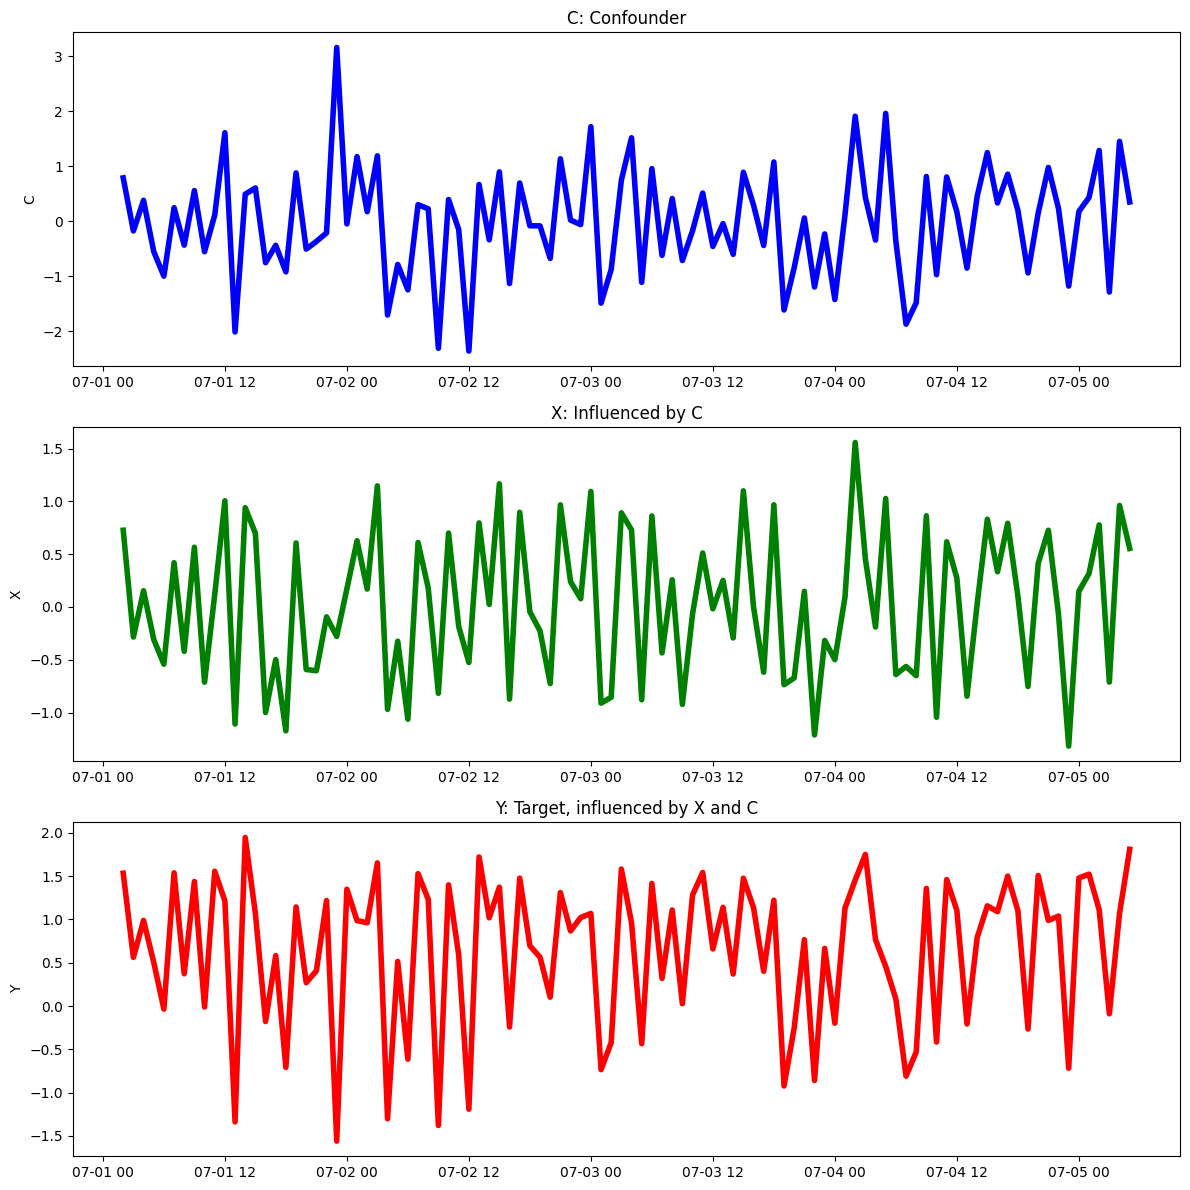

In [36]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Define the provided function
def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = X + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)

    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        'C': C,
        'X': X,
        'Y': Y # OT is the target
    })
    return data_df

# Generate the data
data_df = generate_data(seq_length=100)  # Using the full 1000 data points

# Plotting C, X, and Y
fig, axes = plt.subplots(3, 1, figsize=(12, 12), facecolor='white')

# Plot C
axes[0].plot(data_df['date'], data_df['C'], color='blue', linewidth=4)
axes[0].set_title('C: Confounder')
axes[0].set_ylabel('C')

# Plot X
axes[1].plot(data_df['date'], data_df['X'], color='green', linewidth=4)
axes[1].set_title('X: Influenced by C')
axes[1].set_ylabel('X')

# Plot Y
axes[2].plot(data_df['date'], data_df['Y'], color='red', linewidth=4)
axes[2].set_title('Y: Target, influenced by X and C')
axes[2].set_ylabel('Y')

plt.tight_layout()
plt.show()


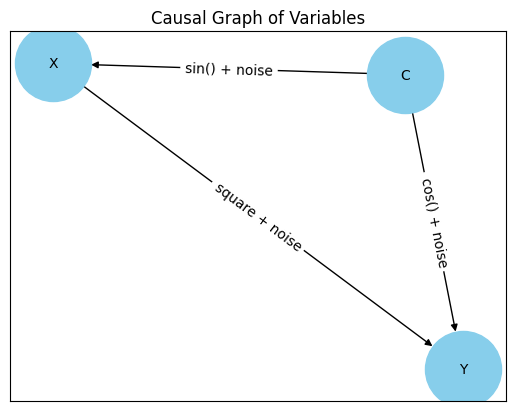

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes and edges based on the causal relationships in the code
G.add_edge('C', 'X', label='sin() + noise')
G.add_edge('C', 'Y', label='cos() + noise')
G.add_edge('X', 'Y', label='square + noise')

# Graph layout
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_color="black")
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Causal Graph of Variables')
plt.show()


In [4]:
# data_df_simple_linear.index = data_df_simple_linear['date']
# plt.figure(figsize=(10, 6))
# plt.plot(data_df_simple_linear.index, data_df_simple_linear["OT"], label='Actual Values', color='blue')
# plt.show()

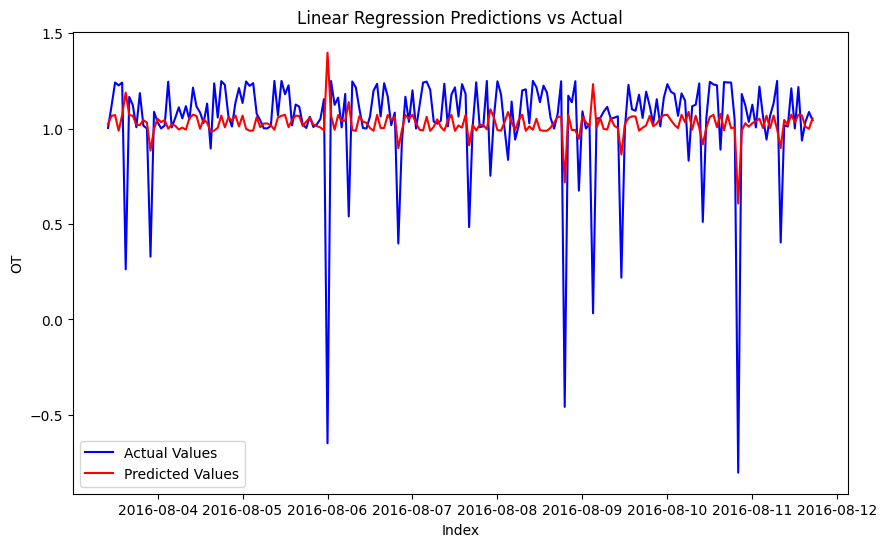

Mean Squared Error: 0.07630429906172216
Mean Absolute Error: 0.15200597939633959


(LinearRegression(), 0.07630429906172216, 0.15200597939633959)

In [37]:
run_linear_regression(data_df_simple_linear, ['0', '1'], 'OT', test_ratio=0.2)


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


799/799 - 1s - 1ms/step - loss: 0.0324
Epoch 2/30
799/799 - 0s - 482us/step - loss: 0.0136
Epoch 3/30
799/799 - 0s - 470us/step - loss: 0.0135
Epoch 4/30
799/799 - 0s - 466us/step - loss: 0.0135
Epoch 5/30
799/799 - 0s - 461us/step - loss: 0.0133
Epoch 6/30
799/799 - 0s - 470us/step - loss: 0.0131
Epoch 7/30
799/799 - 0s - 467us/step - loss: 0.0129
Epoch 8/30
799/799 - 0s - 491us/step - loss: 0.0131
Epoch 9/30
799/799 - 0s - 472us/step - loss: 0.0129
Epoch 10/30
799/799 - 0s - 489us/step - loss: 0.0126
Epoch 11/30
799/799 - 0s - 487us/step - loss: 0.0125
Epoch 12/30
799/799 - 0s - 474us/step - loss: 0.0121
Epoch 13/30
799/799 - 0s - 475us/step - loss: 0.0118
Epoch 14/30
799/799 - 0s - 469us/step - loss: 0.0117
Epoch 15/30
799/799 - 0s - 484us/step - loss: 0.0114
Epoch 16/30
799/799 - 0s - 466us/step - loss: 0.0109
Epoch 17/30
799/799 - 0s - 479us/step - loss: 0.0105
Epoch 18/30
799/799 - 0s - 466us/step - loss: 0.0101
Epoch 19/30
799/799 - 0s - 466us/step - loss: 0.0097
Epoch 20/30
799

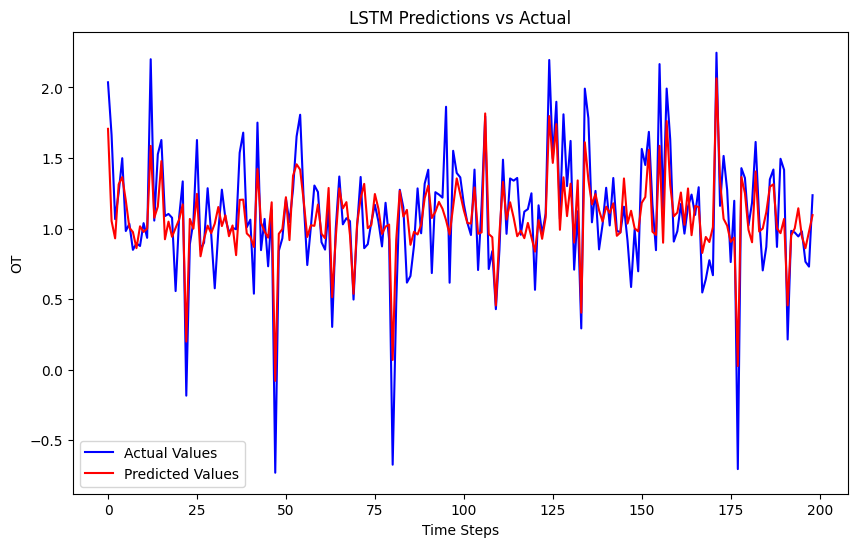

Mean Squared Error: 0.05934235318088878
Mean Absolute Error: 0.18559626589569095


(<Sequential name=sequential, built=True>,
 0.05934235318088878,
 0.18559626589569095)

In [8]:
run_lstm(data_df_simple_linear, ['0', '1'], 'OT', look_back=1, test_ratio=0.2, epochs=30, batch_size=1)

In [36]:
#OLD ONE run_lstm_multifeature(data_df_simple_linear, ['0', '1'], 'OT', look_back=4, test_ratio=0.2)

# Dataset with 3 variables + noise, 1 confounding one (LINEAR)  with Autocorrelations and Lagged Variables

In [43]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    
    # Initialize X with initial random values
    X = np.zeros(seq_length)
    X[0] = np.random.normal()
    
    # Generate X with autocorrelation and influence by C
    for i in range(1, seq_length):
        X[i] = 0.7 * X[i-1] + np.sin(C[i]) + np.random.normal(loc=0, scale=0.2)
    
    # Initialize Y with initial random values
    Y = np.zeros(seq_length)
    Y[0] = np.random.normal()
    
    # Generate Y influenced by current and lagged X and current C
    for i in range(1, seq_length):
        Y[i] = 0.5 * Y[i-1] + np.square(X[i]) + 0.3 * np.square(X[i-1]) + np.cos(C[i]) + np.random.normal(loc=0, scale=0.2)
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        'OT': Y  # Y is the target
    })
    return data_df

# Generate and save the data
data_df = generate_data(seq_length=1000)
df_linear_autocorrelations = data_df.copy()
data_df.to_csv('data_with_autocorrelations.csv', index=False)


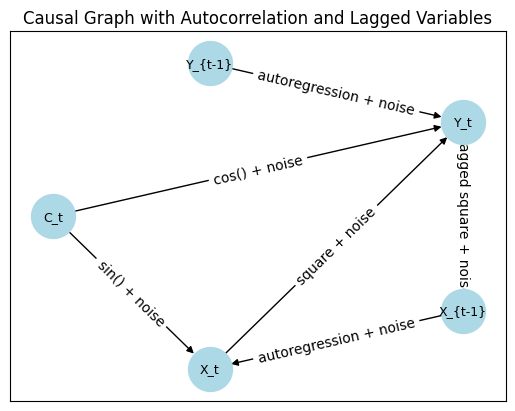

In [12]:
# Creating a directed graph for the updated causal model with autocorrelation and lagged variables
G_updated = nx.DiGraph()

# Adding nodes and edges based on the causal relationships in the updated code
G_updated.add_edge('C_t', 'X_t', label='sin() + noise')
G_updated.add_edge('X_{t-1}', 'X_t', label='autoregression + noise')
G_updated.add_edge('C_t', 'Y_t', label='cos() + noise')
G_updated.add_edge('X_t', 'Y_t', label='square + noise')
G_updated.add_edge('X_{t-1}', 'Y_t', label='lagged square + noise')
G_updated.add_edge('Y_{t-1}', 'Y_t', label='autoregression + noise')

# Graph layout
pos_updated = nx.shell_layout(G_updated)
nx.draw_networkx(G_updated, pos_updated, with_labels=True, node_color='lightblue', node_size=1000, font_size=9, font_color="black")
labels_updated = nx.get_edge_attributes(G_updated,'label')
nx.draw_networkx_edge_labels(G_updated, pos_updated, edge_labels=labels_updated)
plt.title('Causal Graph with Autocorrelation and Lagged Variables')
plt.show()


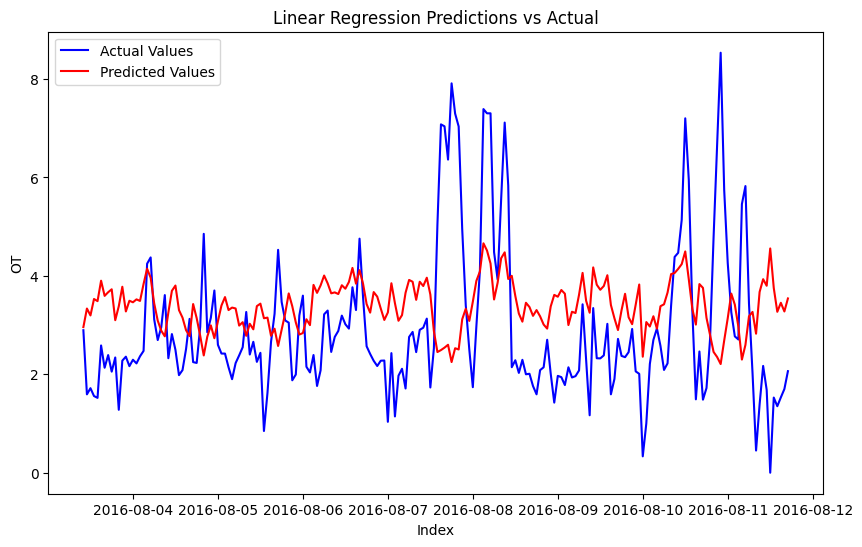

Mean Squared Error: 2.8761614303374974
Mean Absolute Error: 1.3475686123390889


(LinearRegression(), 2.8761614303374974, 1.3475686123390889)

In [52]:
run_linear_regression(df_linear_autocorrelations, ['0', '1'], 'OT', test_ratio=0.2)


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :-1])
        Y.append(data[i + look_back - 1, -1])
    return np.array(X), np.array(Y)

def run_lstm(data, feature_cols, target_col, test_ratio=0.2, look_back=1, epochs=100, batch_size=1):
    """
    Run LSTM on the provided dataset.

    Parameters:
    data (DataFrame): The input data containing features and target.
    feature_cols (list): The names of the columns to be used as features.
    target_col (str): The name of the column to be used as the target.
    test_ratio (float): The proportion of the dataset to include in the test split.
    look_back (int): The number of previous time steps to use as input for predicting the next time step.
    epochs (int): The number of epochs to train the LSTM model.
    batch_size (int): The batch size for training the LSTM model.

    Returns:
    model: The trained LSTM model.
    mse: Mean Squared Error of the model on the test set.
    mae: Mean Absolute Error of the model on the test set.
    """
    data.index = data['date']
    data = data.drop('date', axis=1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    train_data = scaled_data[:-test_size]
    test_data = scaled_data[-test_size:]
    # print(train_data)
    # print(test_data)
    # Create the training and testing datasets
    X_train, Y_train = create_dataset(train_data, look_back)
    X_test, Y_test = create_dataset(test_data, look_back)
   
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, len(feature_cols))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the LSTM model
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Inverse transform the predictions and actual values
    Y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_pred), len(feature_cols))), Y_pred), axis=1))[:, -1]
    Y_test = scaler.inverse_transform(np.concatenate((np.zeros((len(Y_test), len(feature_cols))), Y_test.reshape(-1, 1)), axis=1))[:, -1]
    print(Y_pred)
    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(Y_test)), Y_test, label='Actual Values', color='blue')
    plt.plot(range(len(Y_pred)), Y_pred, label='Predicted Values', color='red')
    plt.title('LSTM Predictions vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel(target_col)
    plt.legend()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae



Epoch 1/30


c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


799/799 - 5s - 6ms/step - loss: 0.0204
Epoch 2/30
799/799 - 2s - 3ms/step - loss: 0.0189
Epoch 3/30
799/799 - 2s - 2ms/step - loss: 0.0186
Epoch 4/30
799/799 - 1s - 2ms/step - loss: 0.0187
Epoch 5/30
799/799 - 3s - 3ms/step - loss: 0.0185
Epoch 6/30
799/799 - 2s - 2ms/step - loss: 0.0181
Epoch 7/30
799/799 - 2s - 3ms/step - loss: 0.0179
Epoch 8/30
799/799 - 1s - 1ms/step - loss: 0.0175
Epoch 9/30
799/799 - 1s - 1ms/step - loss: 0.0173
Epoch 10/30
799/799 - 1s - 2ms/step - loss: 0.0166
Epoch 11/30
799/799 - 1s - 2ms/step - loss: 0.0158
Epoch 12/30
799/799 - 1s - 2ms/step - loss: 0.0147
Epoch 13/30
799/799 - 1s - 2ms/step - loss: 0.0131
Epoch 14/30
799/799 - 2s - 3ms/step - loss: 0.0119
Epoch 15/30
799/799 - 2s - 3ms/step - loss: 0.0105
Epoch 16/30
799/799 - 2s - 2ms/step - loss: 0.0094
Epoch 17/30
799/799 - 2s - 2ms/step - loss: 0.0086
Epoch 18/30
799/799 - 2s - 3ms/step - loss: 0.0081
Epoch 19/30
799/799 - 2s - 3ms/step - loss: 0.0077
Epoch 20/30
799/799 - 2s - 3ms/step - loss: 0.0074


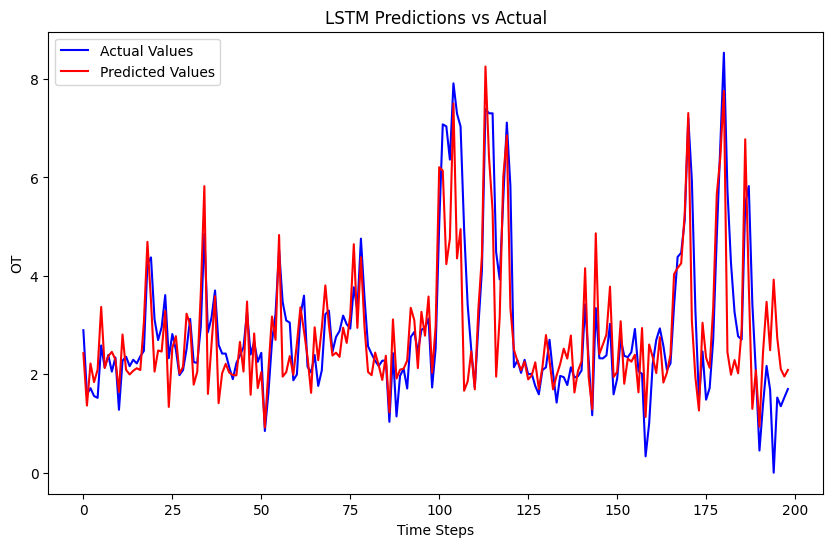

Mean Squared Error: 0.8067192150357737
Mean Absolute Error: 0.6099474622371607


(<Sequential name=sequential_12, built=True>,
 0.8067192150357737,
 0.6099474622371607)

In [49]:
run_lstm(df_linear_autocorrelations, ['0', '1'], 'OT', look_back=1, test_ratio=0.2, epochs=30, batch_size=1)

# Dataset with 3 variables + noise, 1 confounding one (NON-LINEAR)

In [54]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) * np.cos(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        'OT': Y
    })
    return data_df

# Generate data
# Generate and save the data
data_df = generate_data(seq_length=1000) # Set the desired number of rows
data_df_simple_nonlinear= data_df.copy()
# TO CSV data_df.to_csv('data_causal_2.csv', index=False)



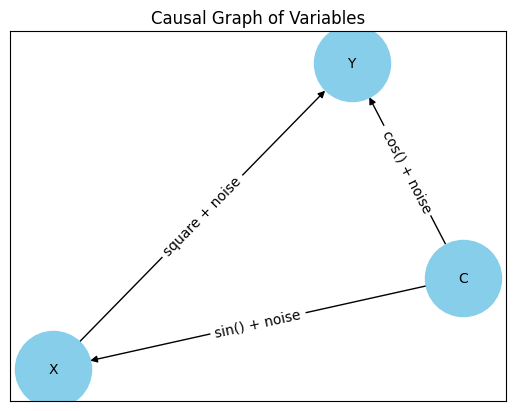

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes and edges based on the causal relationships in the code
G.add_edge('C', 'X', label='sin() + noise')
G.add_edge('C', 'Y', label='cos() + noise')
G.add_edge('X', 'Y', label='square + noise')

# Graph layout
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_color="black")
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Causal Graph of Variables')
plt.show()


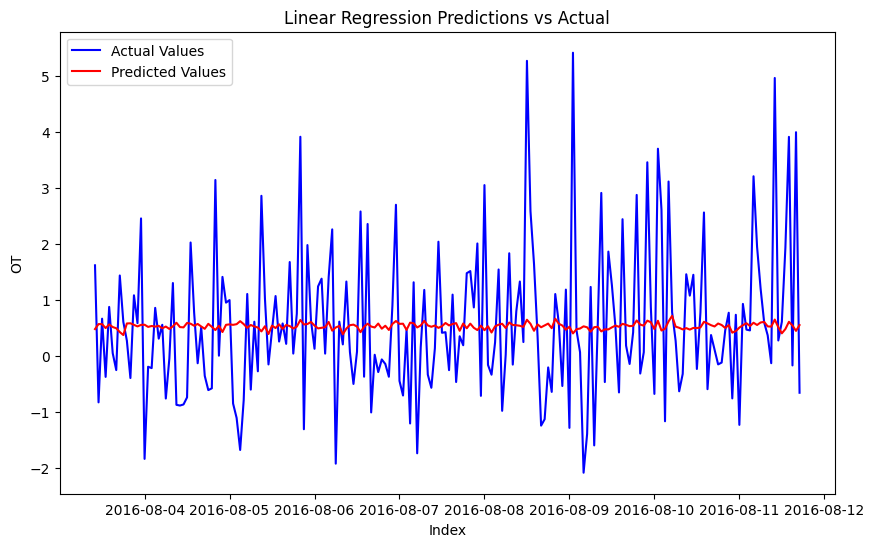

Mean Squared Error: 1.7861602484717494
Mean Absolute Error: 1.0092118649672532


(LinearRegression(), 1.7861602484717494, 1.0092118649672532)

In [55]:
run_linear_regression(data_df_simple_nonlinear, ['0', '1'], 'OT')

Epoch 1/30


c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


799/799 - 3s - 4ms/step - loss: 0.0153
Epoch 2/30
799/799 - 2s - 2ms/step - loss: 0.0085
Epoch 3/30
799/799 - 1s - 1ms/step - loss: 0.0084
Epoch 4/30
799/799 - 1s - 2ms/step - loss: 0.0081
Epoch 5/30
799/799 - 1s - 2ms/step - loss: 0.0082
Epoch 6/30
799/799 - 1s - 2ms/step - loss: 0.0082
Epoch 7/30
799/799 - 1s - 2ms/step - loss: 0.0081
Epoch 8/30
799/799 - 1s - 2ms/step - loss: 0.0080
Epoch 9/30
799/799 - 1s - 2ms/step - loss: 0.0079
Epoch 10/30
799/799 - 1s - 2ms/step - loss: 0.0080
Epoch 11/30
799/799 - 1s - 2ms/step - loss: 0.0078
Epoch 12/30
799/799 - 1s - 2ms/step - loss: 0.0078
Epoch 13/30
799/799 - 1s - 2ms/step - loss: 0.0078
Epoch 14/30
799/799 - 2s - 2ms/step - loss: 0.0076
Epoch 15/30
799/799 - 1s - 2ms/step - loss: 0.0076
Epoch 16/30
799/799 - 1s - 1ms/step - loss: 0.0074
Epoch 17/30
799/799 - 1s - 2ms/step - loss: 0.0073
Epoch 18/30
799/799 - 2s - 2ms/step - loss: 0.0073
Epoch 19/30
799/799 - 2s - 2ms/step - loss: 0.0071
Epoch 20/30
799/799 - 1s - 2ms/step - loss: 0.0070


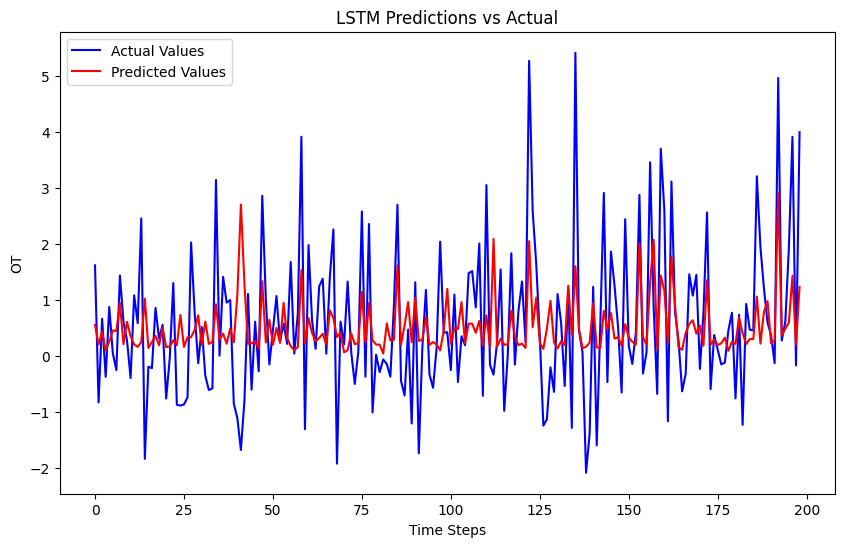

Mean Squared Error: 1.3428361666120299
Mean Absolute Error: 0.8870166656160177


(<Sequential name=sequential_13, built=True>,
 1.3428361666120299,
 0.8870166656160177)

In [56]:
run_lstm(data_df_simple_nonlinear, ['0', '1'], 'OT', look_back=1, test_ratio=0.2, epochs=30, batch_size=1)

# Dataset with 5 variables + noise, 1 confounding one, 2 without causal impact

In [57]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)

    D = np.random.normal(loc=0, scale=0.8, size=seq_length) + np.sin(C) #no causal impact on traget Y (OT)
    E = np.square(X) * np.cos(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    

    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        '2': D,
        '3': E,
        'OT': Y #OT is the target, influenced by C & X
    })
    return data_df

# Set the desired number of rows


# Generate and save the data
data_df = generate_data(seq_length=1000) # Set the desired number of rows
data_df.to_csv('data_causal_4.csv', index=False)

data_df_complex_linear = data_df.copy()

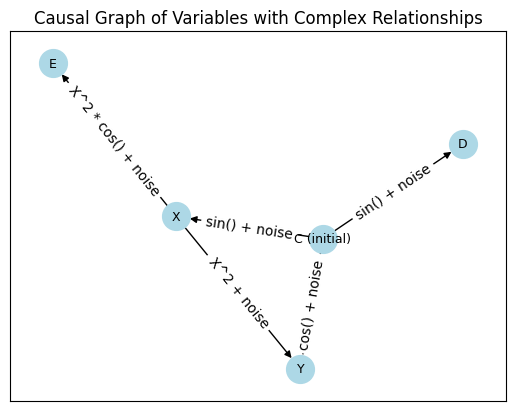

In [64]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph with new relationships
G_complex = nx.DiGraph()

# Adding nodes and edges based on the causal relationships in the updated code
G_complex.add_edge('C (initial)', 'X', label='sin() + noise')
G_complex.add_edge('C (initial)', 'Y', label='cos() + noise')
G_complex.add_edge('C (initial)', 'D', label='sin() + noise')
G_complex.add_edge('X', 'Y', label='X^2 + noise')
G_complex.add_edge('X', 'E', label='X^2 * cos() + noise')

# Graph layout
pos_complex = nx.spring_layout(G_complex)
nx.draw_networkx(G_complex, pos_complex, with_labels=True, node_color='lightblue', node_size=400, font_size=9, font_color="black")
labels_complex = nx.get_edge_attributes(G_complex, 'label')
nx.draw_networkx_edge_labels(G_complex, pos_complex, edge_labels=labels_complex)
plt.title('Causal Graph of Variables with Complex Relationships')
plt.show()


In [181]:
# data_df_complex_linear.index = data_df_complex_linear['date']
# plt.figure(figsize=(10, 6))
# plt.plot(data_df_complex_linear.index, data_df_complex_linear["OT"], label='Actual Values', color='blue')
# plt.show()

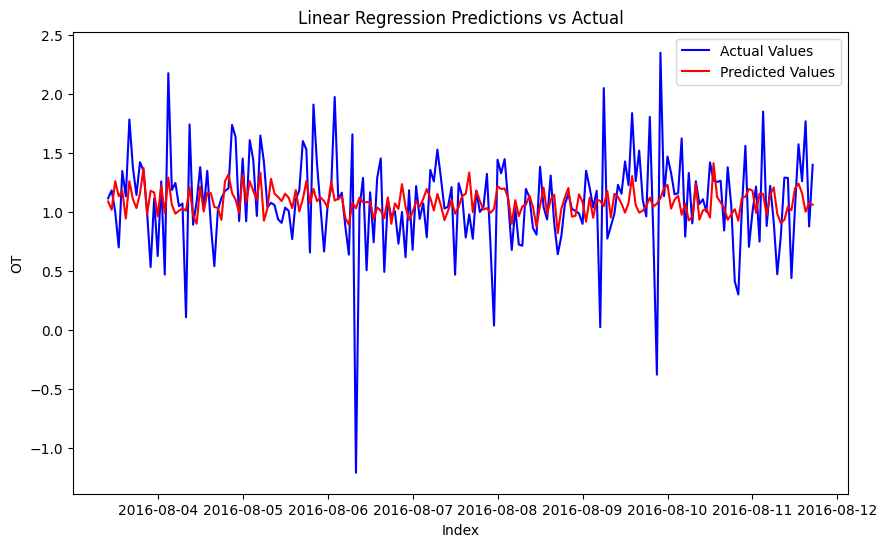

Mean Squared Error: 0.15095461456934184
Mean Absolute Error: 0.2716167572031593


(LinearRegression(), 0.15095461456934184, 0.2716167572031593)

In [58]:
run_linear_regression(data_df_complex_linear, ['0', '1', '2', '3'], 'OT')

Epoch 1/30


c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


799/799 - 3s - 4ms/step - loss: 0.0327
Epoch 2/30
799/799 - 1s - 2ms/step - loss: 0.0139
Epoch 3/30
799/799 - 2s - 2ms/step - loss: 0.0137
Epoch 4/30
799/799 - 3s - 3ms/step - loss: 0.0135
Epoch 5/30
799/799 - 2s - 3ms/step - loss: 0.0134
Epoch 6/30
799/799 - 2s - 3ms/step - loss: 0.0133
Epoch 7/30
799/799 - 1s - 2ms/step - loss: 0.0134
Epoch 8/30
799/799 - 1s - 2ms/step - loss: 0.0132
Epoch 9/30
799/799 - 1s - 2ms/step - loss: 0.0132
Epoch 10/30
799/799 - 2s - 2ms/step - loss: 0.0131
Epoch 11/30
799/799 - 2s - 2ms/step - loss: 0.0131
Epoch 12/30
799/799 - 3s - 3ms/step - loss: 0.0129
Epoch 13/30
799/799 - 2s - 2ms/step - loss: 0.0129
Epoch 14/30
799/799 - 2s - 2ms/step - loss: 0.0126
Epoch 15/30
799/799 - 2s - 2ms/step - loss: 0.0126
Epoch 16/30
799/799 - 2s - 2ms/step - loss: 0.0125
Epoch 17/30
799/799 - 3s - 3ms/step - loss: 0.0121
Epoch 18/30
799/799 - 2s - 3ms/step - loss: 0.0122
Epoch 19/30
799/799 - 2s - 2ms/step - loss: 0.0121
Epoch 20/30
799/799 - 2s - 3ms/step - loss: 0.0120


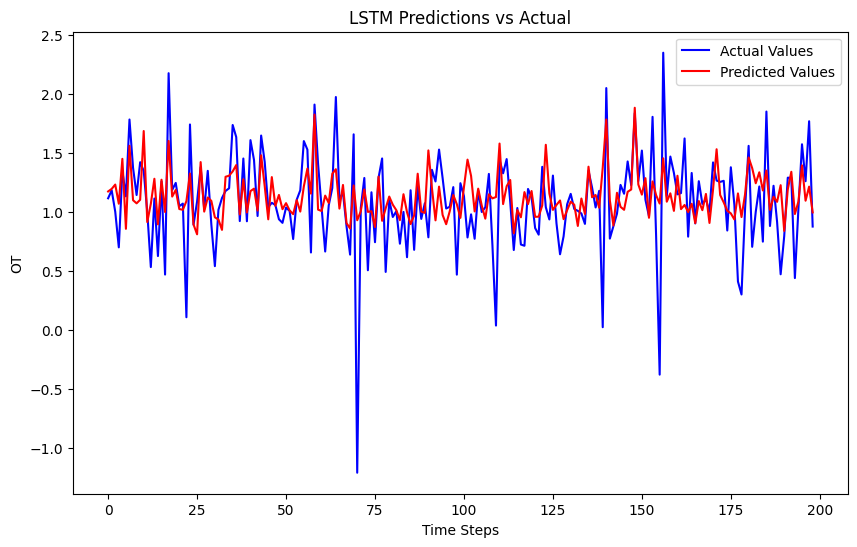

Mean Squared Error: 0.13088579799382544
Mean Absolute Error: 0.24401101333117453


(<Sequential name=sequential_15, built=True>,
 0.13088579799382544,
 0.24401101333117453)

In [60]:
run_lstm(data_df_complex_linear, ['0', '1', '2', '3'], 'OT', look_back=1, test_ratio=0.2, epochs=30, batch_size=1)

## Baselines!

## data_df_simple_linear

In [63]:
data_df_simple_linear

date         0         1        OT
0   2016-07-01 02:00:00  0.966673  0.740733  1.479669
1   2016-07-01 03:00:00  0.932879 -1.017586  1.592570
2   2016-07-01 04:00:00  0.725855  0.967657  2.684124
3   2016-07-01 05:00:00  0.382565  1.117871  2.704597
4   2016-07-01 06:00:00 -0.421994  0.172615  0.472115
..                  ...       ...       ...       ...
995 2016-08-11 13:00:00  0.202893  0.281713  0.660074
996 2016-08-11 14:00:00 -2.254518 -0.240322 -1.030998
997 2016-08-11 15:00:00 -0.314002 -0.088476  0.310916
998 2016-08-11 16:00:00  0.884794 -0.054337 -0.992856
999 2016-08-11 17:00:00 -1.202478 -1.895109  4.955561

[1000 rows x 4 columns]

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def run_linear_regression(data, feature_cols, target_col, test_ratio=0.2):
    """
    Run linear regression on the provided dataset.

    Parameters:
    data (DataFrame): The input data containing features and target.
    feature_cols (list): The names of the columns to be used as features.
    target_col (str): The name of the column to be used as the target.
    test_ratio (float): The proportion of the dataset to include in the test split.

    Returns:
    model: The trained Linear Regression model.
    mse: Mean Squared Error of the model on the test set.
    mae: Mean Absolute Error of the model on the test set.
    """
    data.index = data['date']
    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    train_data = data.iloc[:-test_size]
    test_data = data.iloc[-test_size:]

    X_train = train_data[feature_cols]
    Y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    Y_test = test_data[target_col]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
    plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
    plt.title('Linear Regression Predictions vs Actual')
    plt.xlabel('Index')
    plt.ylabel(target_col)
    plt.legend()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae



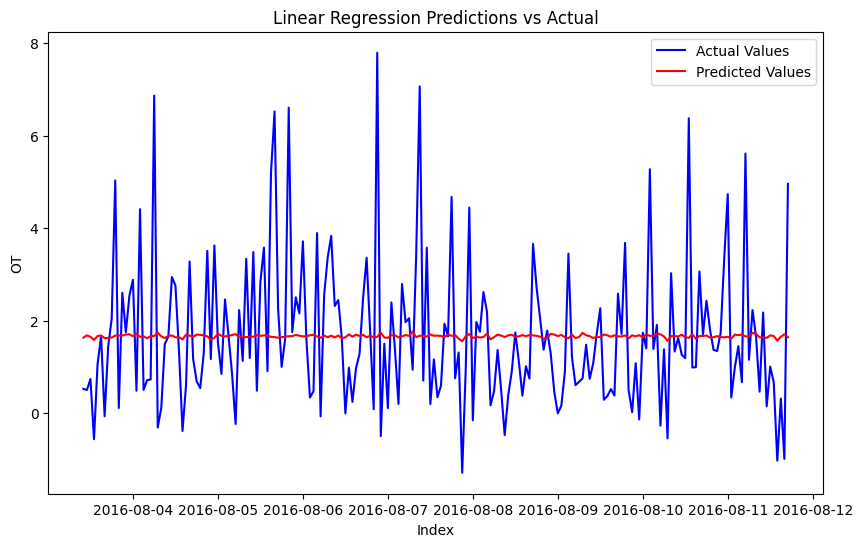

Mean Squared Error: 2.5313751680681587
Mean Absolute Error: 1.1813410350086615


(LinearRegression(), 2.5313751680681587, 1.1813410350086615)

In [71]:
run_linear_regression(data_df_simple_linear, ['0', '1'], 'OT')

Mean Squared Error: 2.869499696118694
Mean Absolute Error: 1.2415997055924057


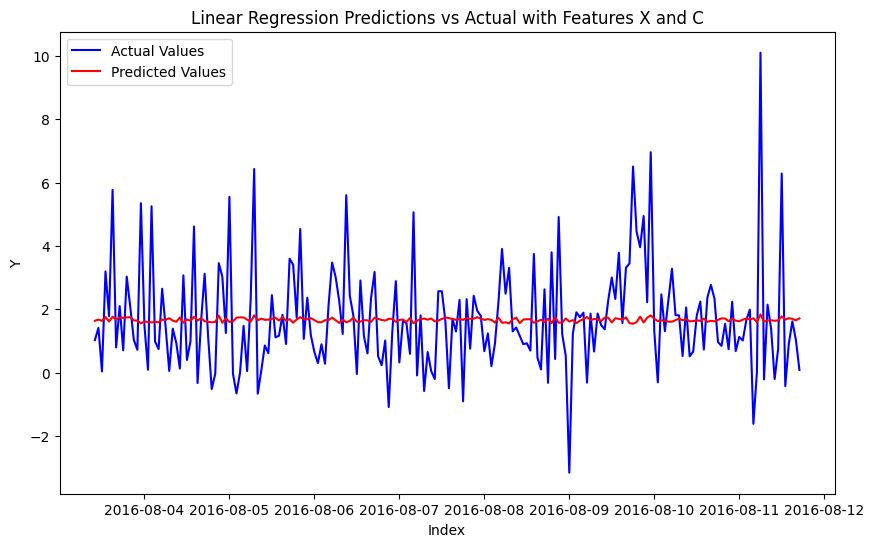

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = data_df_simple_linear.copy() # Update path as necessary
data.index = data["date"]
# Select features and target
X = data[['0', '1']]
Y = data['OT']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[['0', '1']]
Y_train = train_data['OT']
X_test = test_data[['0', '1']]
Y_test = test_data['OT']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


Mean Squared Error: 1.644891152896642
Mean Absolute Error: 1.0106338398733021


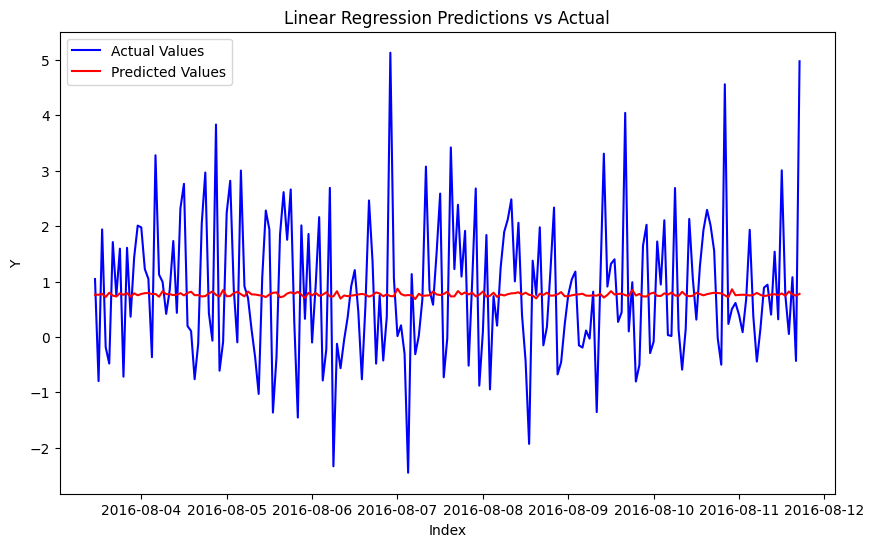

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = data_df.copy()  # make sure your data path is correct
Y = data['Y']

# Create lag features
data['Y_lag1'] = Y.shift(1)
data['Y_lag2'] = Y.shift(2)

# Remove NaN values that result from the lag operation
data = data.dropna()

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index
train_data = data[:-test_size]
test_data = data[-test_size:]

# Define features and target
X_train = train_data[['Y_lag1', 'Y_lag2']]
Y_train = train_data['Y']
X_test = test_data[['Y_lag1', 'Y_lag2']]
Y_test = test_data['Y']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = data_df  # Update path as necessary

# Select features and target
X = data[['X', 'C']]
Y = data['Y']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[['X', 'C']]
Y_train = train_data['Y']
X_test = test_data[['X', 'C']]
Y_test = test_data['Y']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


KeyError: "None of [Index(['X', 'C'], dtype='object')] are in the [columns]"

In [78]:
data_df

date         0         1        OT
0   2016-07-01 02:00:00  0.319940  0.219588  1.196932
1   2016-07-01 03:00:00  0.385308 -0.497375  1.006739
2   2016-07-01 04:00:00 -0.942470 -1.360758  1.398245
3   2016-07-01 05:00:00  0.104528 -0.783378  1.634444
4   2016-07-01 06:00:00  0.792911  0.258154 -0.045223
..                  ...       ...       ...       ...
995 2016-08-11 13:00:00  0.406236 -0.068060 -0.428902
996 2016-08-11 14:00:00  1.882956  0.121554  0.905303
997 2016-08-11 15:00:00  1.659560 -0.229964  1.616727
998 2016-08-11 16:00:00  0.558850 -0.733833  1.032354
999 2016-08-11 17:00:00  1.045627  0.419608  0.080121

[1000 rows x 4 columns]

In [77]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
data = 0
# Load your dataset
data = data_df  # Update path as necessary

# Select features and target
X = data[['X', 'C']]
Y = data['Y']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[['X', 'C']]
Y_train = train_data['Y']
X_test = test_data[['X', 'C']]
Y_test = test_data['Y']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


KeyError: "None of [Index(['X', 'C'], dtype='object')] are in the [columns]"

In [43]:
data_df3

date         0         1         2         3        OT
0    2016-07-01 02:00:00 -0.352822 -0.409858 -0.505936  0.083544  0.441378
1    2016-07-01 03:00:00  0.392530  0.225523  1.092889  0.121622  1.896103
2    2016-07-01 04:00:00  1.291451  0.933349  1.102326  0.125796 -0.135328
3    2016-07-01 05:00:00 -0.570826 -0.627299 -0.350626  0.305134  1.048835
4    2016-07-01 06:00:00  0.617017  0.682011 -0.099283  0.121796  0.405358
...                  ...       ...       ...       ...       ...       ...
2995 2016-11-02 21:00:00 -0.296730 -0.121767 -0.838905 -0.241487  2.004070
2996 2016-11-02 22:00:00  0.107100 -0.007417  1.050701  0.006618  0.624499
2997 2016-11-02 23:00:00  1.084363  0.872346 -0.552176  0.109519  1.832230
2998 2016-11-03 00:00:00 -1.829897 -0.981977 -0.609478 -0.133088  0.752449
2999 2016-11-03 01:00:00 -0.147266 -0.303041 -0.006004  0.012305  1.385953

[3000 rows x 6 columns]

Mean Squared Error: 0.7593857994063179
Mean Absolute Error: 0.6953434450126695


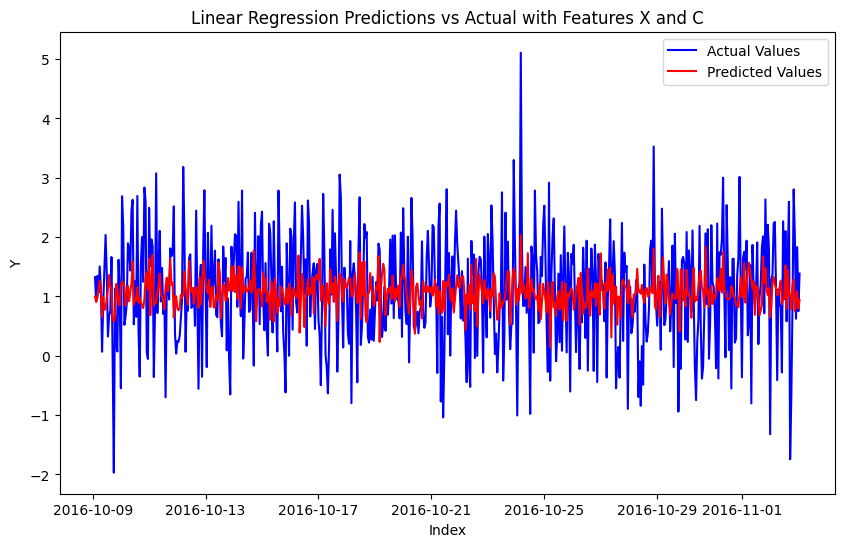

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
data = 0
# Load your dataset
data = data_df3  # Update path as necessary

# Select features and target
X = data[["0","1","2","3"]]
Y = data['OT']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[["0","1","2","3"]]
Y_train = train_data['OT']
X_test = test_data[["0","1","2","3"]]
Y_test = test_data['OT']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


OLD:

In [1]:
import numpy as np
import pandas as pd
from datasets import DatasetDict, Dataset

def generate_complex_data(n_samples=20, seq_length=1000): #(n_samples=862, seq_length=17544):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=n_samples)
    
    data = []
    for i in range(n_samples):
        # X is influenced by C
        X = np.sin(C[i]) + np.random.normal(loc=0, scale=0.2, size=seq_length)
        # Y is influenced by X and C in a non-linear way
        Y = np.square(X) + np.cos(C[i]) + np.random.normal(loc=0, scale=0.2, size=seq_length)
        
        item = {
            'start': pd.Period('2015-01-01 00:00', freq='H').strftime('%Y-%m-%d %H:%M'),
            'target': Y.tolist(),
            'feat_static_cat': [i],
            'feat_dynamic_real': None,
            'item_id': f'T{i+1}'
        }
        data.append(item)
    
    return data

# Generate the test dataset with the maximum length
test_data = generate_complex_data(seq_length=1000)

# Create the validation dataset by removing the last 48 elements from each target sequence
validation_data = [{**item, 'target': item['target'][:-48]} for item in test_data]

# Create the train dataset by removing the last 96 elements from each target sequence
train_data = [{**item, 'target': item['target'][:-96]} for item in test_data]

# Create the DatasetDict
dataset_dict = DatasetDict({
    'train': Dataset.from_list(train_data),
    'validation': Dataset.from_list(validation_data),
    'test': Dataset.from_list(test_data)
})

# Print the dataset structure
print(dataset_dict)

# Access an example from the train dataset
print(dataset_dict['train'][0])

c:\Users\florisschouw\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 20
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 20
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 20
    })
})
{'start': '2015-01-01 00:00', 'target': [1.7498655105034728, 1.0408262439097655, 1.1505409109563292, 1.2627998146258197, 1.238665299384904, 1.3301700691138518, 1.0123280313774812, 1.4308180130979427, 1.2262508245770178, 1.3409557683246331, 0.8814832444151004, 1.2497933010890205, 1.263116596167181, 0.7884447724249355, 1.3843831872058923, 1.2861955411856403, 0.9774263609314559, 1.5375537780481667, 1.330914945207989, 0.9265989419078962, 0.9801024042930833, 1.4303072720791095, 1.2385973315265868, 1.028544063060652, 0.944190692185495, 0.9978577024601392, 1.4141